# Data Analysis for Thesis
## Step 1 Read Data

In [1]:
import pandas as pd
import seaborn as sns
articles=pd.read_csv('/Users/chenyuli/Research_Thesis/validate/20210707/20210707_articles.csv'
                    )
# change Journal name to uppercase for future mapping
alphanumeric = ""
for i in range(len(articles.Journal)):
    articles.Journal[i]=articles.Journal[i].upper()
    articles.Journal[i].replace("''", "")
    articles.ISSN[i]=articles.ISSN[i][1:]
        

/var/folders/v0/r16j2f9545n7rrq_rvqlxn180000gn/T/ipykernel_11503/788572280.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles.Journal[i]=articles.Journal[i].upper()
/var/folders/v0/r16j2f9545n7rrq_rvqlxn180000gn/T/ipykernel_11503/788572280.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles.ISSN[i]=articles.ISSN[i][1:]


In [2]:
articles.head()

,EndNote_ID,Article_Name,Abstract,Year,Journal,PubMed_ID,Language,DOI,ISSN
0,1,"The ""All of Us"" Research Program",Knowledge gained from observational cohort stu...,2019,NEW ENGLAND JOURNAL OF MEDICINE,31412182,eng,10.1056/NEJMsr1809937,0028-4793
1,2,Evaluation and accurate diagnoses of pediatric...,Artificial intelligence (AI)-based methods hav...,2019,NATURE MEDICINE,30742121,eng,10.1038/s41591-018-0335-9,1078-8956
2,3,A large electronic-health-record-based genome-...,"A genome-wide association study¬†(GWAS) of 94,...",2018,NATURE GENETICS,29507422,eng,10.1038/s41588-018-0064-5,1061-4036
3,4,Effect of Electronic Health Record-Based Medic...,IMPORTANCE: Complex medication regimens pose s...,2018,JAMA INTERN MED,29987324,eng,10.1001/jamainternmed.2018.2372,2168-6106
4,5,Prediction of myopia development among Chinese...,BACKGROUND: Electronic medical records provide...,2018,PLOS MEDICINE,30399150,eng,10.1371/journal.pmed.1002674,1549-1277


In [3]:
Years=articles['Year']

In [4]:
Cal_Year=Years.value_counts().reset_index().rename(columns={'index':'Year','Year':'paper_count'})
Cal_Year
Cal_Year.sort_values('Year')
Cal_Year_graph=Cal_Year[Cal_Year.Year!=2020]


## Step 2 Explore data characteristics

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

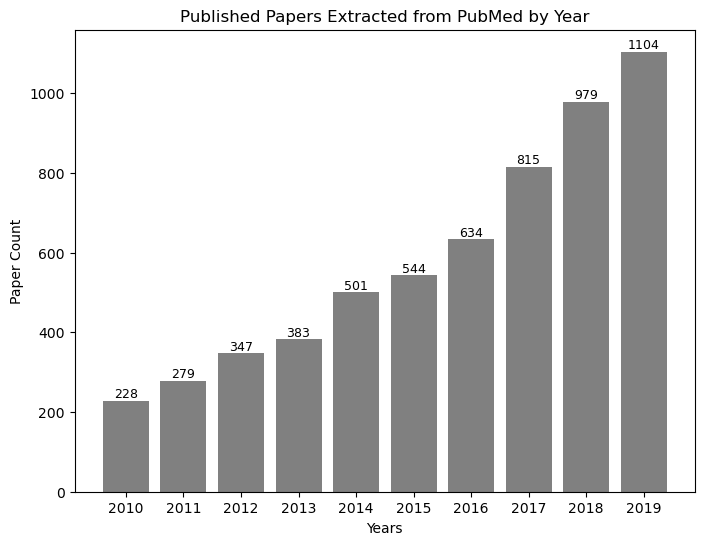

In [6]:
plt.rcdefaults()
fig, g1 = plt.subplots(figsize=(8, 6))
g1 .bar('Year','paper_count',data=Cal_Year_graph,color="gray",align='center')

#g1.set_title("Paper Extracted from PubMed by Year")
plt.ylabel("Paper Count")
plt.xlabel("Years")
g1.set_xticks(Cal_Year_graph.Year)
for a,b in zip(Cal_Year_graph.Year,Cal_Year_graph.paper_count):
    g1.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=9)
plt.title('Published Papers Extracted from PubMed by Year')
plt.show()

In [7]:
paper_2010=list(articles[articles.Year==2010].EndNote_ID)
paper_2011=list(articles[articles.Year==2011].EndNote_ID)
paper_2012=list(articles[articles.Year==2012].EndNote_ID)
paper_2013=list(articles[articles.Year==2013].EndNote_ID)
paper_2014=list(articles[articles.Year==2014].EndNote_ID)
paper_2015=list(articles[articles.Year==2015].EndNote_ID)
paper_2016=list(articles[articles.Year==2016].EndNote_ID)
paper_2017=list(articles[articles.Year==2017].EndNote_ID)
paper_2018=list(articles[articles.Year==2018].EndNote_ID)
paper_2019=list(articles[articles.Year==2019].EndNote_ID)

In [8]:
print(len(paper_2010+paper_2011+paper_2012+paper_2013))
print(len(paper_2014+paper_2015+paper_2016))
print(len(paper_2017))
print(len(paper_2018))
print(len(paper_2019))

1237
1679
815
979
1104


## Step 3 Take Sample Papers to Read

In [9]:
# import package random, sample 300 papers per epoch. 
import random
import pandas as pd
random.seed(2020)
sp2010_2013=random.sample(paper_2010+paper_2011+paper_2012+paper_2013,300)
sp2014_2016=random.sample(paper_2014+paper_2015+paper_2016,300)
sp2017=random.sample(paper_2017,300)
sp2018=random.sample(paper_2018,300)
sp2019=random.sample(paper_2019,300)

In [10]:
article_list=[sp2010_2013,sp2014_2016,sp2017,sp2018,sp2019]
article_df=pd.DataFrame(article_list)

In [11]:
article_df=article_df.rename(index={0:'2010-2013',1:'2014-2016',2:'2017',3:'2018',4:'2019'})
article_df.index
# sample article index_number we need to get articles from the list until reach 35 articles we include.

Index(['2010-2013', '2014-2016', '2017', '2018', '2019'], dtype='object')

### Sample papers by Epochs

In [12]:
Samples_2010_2013=article_df.iloc[0,0:300]
#Samples_2010_2013[49:100]
Samples_2014_2016=article_df.iloc[1,0:300]
#Samples_2014_2016[49:100]
Samples_2017=article_df.iloc[2,0:300]
#Samples_2017[50:100]
Samples_2018=article_df.iloc[3,0:300]
#Samples_2018[50:100]
Samples_2019=article_df.iloc[4,0:300]
#Samples_2019[49:101]

In [13]:
# check repeat number    
import pandas as pd
df2014_2016=pd.DataFrame(sp2014_2016)
df2010_2013=pd.DataFrame(sp2010_2013)
df2017=pd.DataFrame(sp2017)

In [14]:
# save the sampled article pool 
article_df.to_csv('Sampled_EndnoteId',index=True)

In [15]:
articles.Journal.value_counts()

PLOS ONE                                                   133
BMJ OPEN                                                   131
JOURNAL OF THE AMERICAN MEDICAL INFORMATICS ASSOCIATION     69
PHARMACOEPIDEMIOLOGY AND DRUG SAFETY                        63
J TRAUMA ACUTE CARE SURG                                    56
                                                          ... 
THER INNOV REGUL SCI                                         1
KYOBU GEKA JAPANESE JOURNAL OF THORACIC SURGERY              1
FORSCH KOMPLEMENTMED                                         1
ARQUIVOS BRASILEIROS DE CARDIOLOGIA                          1
JOURNAL OF MEDICAL GENETICS                                  1
Name: Journal, Length: 1404, dtype: int64

In [16]:
Journal_list=articles.Journal.value_counts().reset_index().rename(columns={'index':'Journal_name','Journal':'paper_count'})

In [17]:
Top_10=Journal_list.head(10)
Top_10

,Journal_name,paper_count
0,PLOS ONE,133
1,BMJ OPEN,131
2,JOURNAL OF THE AMERICAN MEDICAL INFORMATICS AS...,69
3,PHARMACOEPIDEMIOLOGY AND DRUG SAFETY,63
4,J TRAUMA ACUTE CARE SURG,56
5,AMERICAN JOURNAL OF MANAGED CARE,53
6,INTERNATIONAL JOURNAL OF MEDICAL INFORMATICS,52
7,BMC HEALTH SERVICES RESEARCH,48
8,BMC MEDICAL INFORMATICS AND DECISION MAKING,43
9,JOURNAL OF MEDICAL INTERNET RESEARCH,40


## Plot Papers by Journal

/Users/chenyuli/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<BarContainer object of 10 artists>

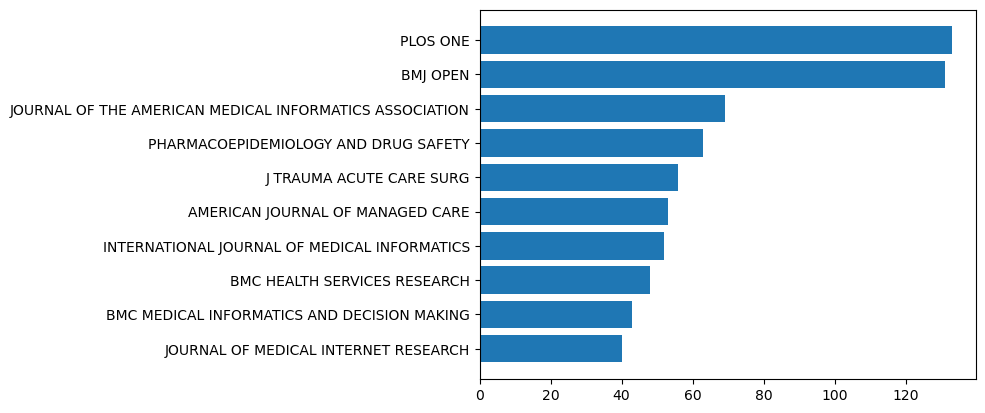

In [18]:
import seaborn
import matplotlib.pyplot as plt
Top_10.sort_values('paper_count',inplace=True)
plt.barh(Top_10.Journal_name,Top_10.paper_count,align='center')
#plt.xticks(rotaion=45)

## Step 4 Interrater Reliability Check

#### Select 20 papers for second reader to annotate/ May 31st 2020 
Second reviewer reviewed the test cohort 1 list, inter-rater reliability was calculated based on test cohort. 

## Step 5  Analyze Included Papers 

07_07_2021

In [19]:
Article_Review=pd.read_csv('/Users/chenyuli/Research_Thesis/Validate/20210707/Validated_Article_Review.csv')
AR_Include=Article_Review[Article_Review.Include_in_Research=='Yes']
AR_Include

,Review_ID,included_No,Reviewer_ID,EndNote_Index,Pubmed_ID,Year,Article_Name,Review_Date,First_Author,Key_words,...,Association_Type,Unit_of_Analysis,Check_List,Mention_Missing_Data,Assessed_Missing_Data,Rate_of_Article,Include_in_Research,Exclusion Reason,Other_Notes,Unnamed: 28
4,5.0,1.0,NaN,3197,31167871,2019,Trends in the incidence of testing for vitamin...,12/27/20,"Crowe, F. L.",Adult\nAged\nEthnic Groups\nFemale\nHumans\nIn...,...,Asosciation,patient,No,"Yes, limitation",No,NaN,Yes,NaN,NaN,NaN
10,11.0,2.0,NaN,1259,31306445,2019,An interactive nomogram to predict healthcare-...,12/27/20,"Zhang, M.",Acinetobacter Infections/diagnosis/epidemiolog...,...,Association,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN
11,12.0,3.0,NaN,1538,31881945,2019,Sex differences in 10-year ischemic cardiovasc...,12/27/20,"Yang, L.",Aged\nChina/epidemiology\nComorbidity\nDatabas...,...,Association,patient,No,No,No,NaN,Yes,NaN,NaN,NaN
12,13.0,4.0,NaN,3304,31332959,2019,Clinical outcomes of external beam radiotherap...,12/27/20,"Lee, C. C.",Aged\nFollow-Up Studies\nHumans\nMale\nMiddle ...,...,Association,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN
14,15.0,5.0,NaN,1717,31210654,2019,Preoperative Pulmonary Function Test Results A...,12/27/20,"Burjek, N. E.",ng/*physiopathology\nMale\nMaximal Respiratory...,...,Association,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,381.0,31.0,NaN,4917,22871081,2012,Likelihood of acute coronary syndrome in emerg...,7/7/21,"Ekelund, U.",Acute Coronary Syndrome/*complications/*diagno...,...,Associaiton,Patient,No,"Yes, data cleaning","Yes, excluded",NaN,Yes,NaN,NaN,NaN
386,387.0,32.0,NaN,5805,23756616,2013,Synchronization of administrations of chemothe...,7/7/21,"Hill, J. W.",Adolescent\nAdult\nAged\nAmbulatory Care Facil...,...,Association,Patient,No,"Yes, data description",No,NaN,Yes,NaN,NaN,NaN
388,389.0,33.0,NaN,3587,22484068,2013,Comparisons of 30-day mortalities and 90-day f...,7/7/21,"Kim, K. H.","Adult\nAged\nAged, 80 and over\nBody Mass Inde...",...,Association,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN
390,391.0,34.0,NaN,4342,21801091,2011,Risk factors for emergent preterm delivery in ...,7/7/21,"Fishman, S. G.",Adult\nCohort Studies\nFemale\nGestational Age...,...,Associaiton,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN


In [20]:
# 07/12/add Journal analysis 
Included_list_Journal=articles[articles.EndNote_ID.isin(AR_Include.EndNote_Index)].Journal.value_counts().reset_index().rename(columns={'index':'Journal_name','Journal':'paper_count'})
Included_list_Journal


,Journal_name,paper_count
0,BMJ OPEN,5
1,PLOS ONE,4
2,ANNALS OF THE RHEUMATIC DISEASES,3
3,MATERN CHILD HEALTH J,2
4,WORLD NEUROSURGERY,2
...,...,...
140,SURGERY,1
141,SCAND J UROL,1
142,PEDIATRIC DIABETES,1
143,PREVENTING CHRONIC DISEASE,1


/Users/chenyuli/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<BarContainer object of 10 artists>

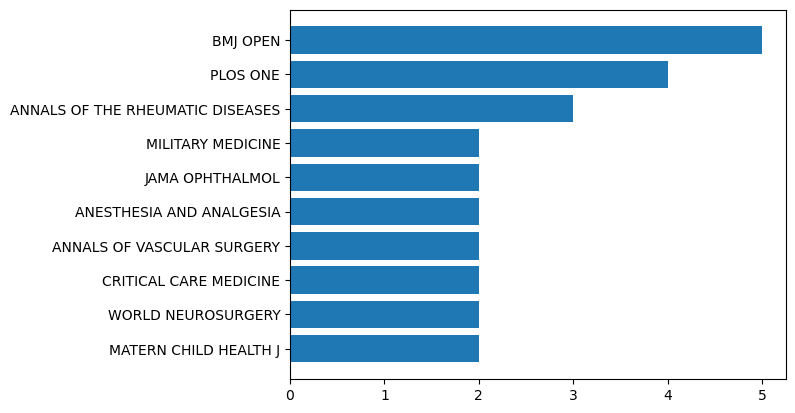

In [21]:
I_Top_10=Included_list_Journal.head(10)
I_Top_10.sort_values('paper_count',inplace=True)
plt.barh(I_Top_10.Journal_name,I_Top_10.paper_count,align='center')

In [22]:
# included papers 
I_Papers=articles[articles['EndNote_ID'].isin(AR_Include.EndNote_Index)]
I_Papers

,EndNote_ID,Article_Name,Abstract,Year,Journal,PubMed_ID,Language,DOI,ISSN
421,422,Evaluation of the quality of antenatal care us...,BACKGROUND: Evaluation of the quality of anten...,2014,BMC PREGNANCY AND CHILDBIRTH,24885103,eng,10.1186/1471-2393-14-168,1471-2393
689,690,The effectiveness of varenicline versus nicoti...,BACKGROUND: There is limited evidence about th...,2017,INTERNATIONAL JOURNAL OF EPIDEMIOLOGY,29040555,eng,10.1093/ije/dyx109,0300-5771
690,691,Development and validation of an ICD-10-based ...,BACKGROUND: There was no established disabilit...,2018,INJURY,29352592,eng,10.1016/j.injury.2017.12.021,0020-1383
699,700,Cost Savings from Reducing Pain Through the De...,OBJECTIVES: An important task facing hospitals...,2018,JOURNAL OF ALTERNATIVE AND COMPLEMENTARY MEDICINE,29474095,eng,10.1089/acm.2017.0203,1075-5535
729,730,The clinical epidemiology of fatigue in newly ...,BACKGROUND: Fatigue is a common and distressin...,2017,BMC CARDIOVASCULAR DISORDERS,28490326,eng,10.1186/s12872-017-0555-9,1471-2261
...,...,...,...,...,...,...,...,...,...
5782,5783,Association Between Positive Cultures During A...,The number of patients with cancer being admit...,2018,CANCER CONTROL,30086666,eng,10.1177/1073274818794162,1073-2748
5789,5790,Zolpidem is independently associated with incr...,BACKGROUND: Inpatient falls are associated wit...,2013,JOURNAL OF HOSPITAL MEDICINE,23165956,eng,10.1002/jhm.1985,1553-5592
5791,5792,Racial/ethnic differences in the prevalence of...,OBJECTIVE: To examine racial/ethnic difference...,2013,DIABETES CARE,23238659,eng,10.2337/dc12-0951,0149-5992
5804,5805,Synchronization of administrations of chemothe...,PURPOSE: The erythropoiesis-stimulating agents...,2013,SUPPORTIVE CARE IN CANCER,23756616,eng,10.1007/s00520-013-1830-7,0941-4355


In [23]:
I_Years=I_Papers['Year']
I_Years_Count=I_Years.value_counts().reset_index().rename(columns={'index':'Year','Year':'included_number'}).sort_values('Year').reset_index()
I_Years_Count['epoch']=['epoch 1','epoch 1','epoch 1','epoch 1','epoch 2','epoch 2','epoch 2','epoch 3','epoch 4','epoch 5']
I_Years_Count

,index,Year,included_number,epoch
0,9,2010,4,epoch 1
1,6,2011,9,epoch 1
2,8,2012,6,epoch 1
3,4,2013,16,epoch 1
4,7,2014,7,epoch 2
5,5,2015,11,epoch 2
6,3,2016,17,epoch 2
7,0,2017,35,epoch 3
8,1,2018,35,epoch 4
9,2,2019,35,epoch 5


   index  Year  included_number    epoch hatches   colors
0      9  2010                4  epoch 1       /  #08519c
1      6  2011                9  epoch 1       /  #08519c
2      8  2012                6  epoch 1       /  #08519c
3      4  2013               16  epoch 1       /  #08519c
4      7  2014                7  epoch 2      //  #3182bd
5      5  2015               11  epoch 2      //  #3182bd
6      3  2016               17  epoch 2      //  #3182bd
7      0  2017               35  epoch 3     ///  #6baed6
8      1  2018               35  epoch 4    ////  #bdd7e7
9      2  2019               35  epoch 5   /////  #eff3ff


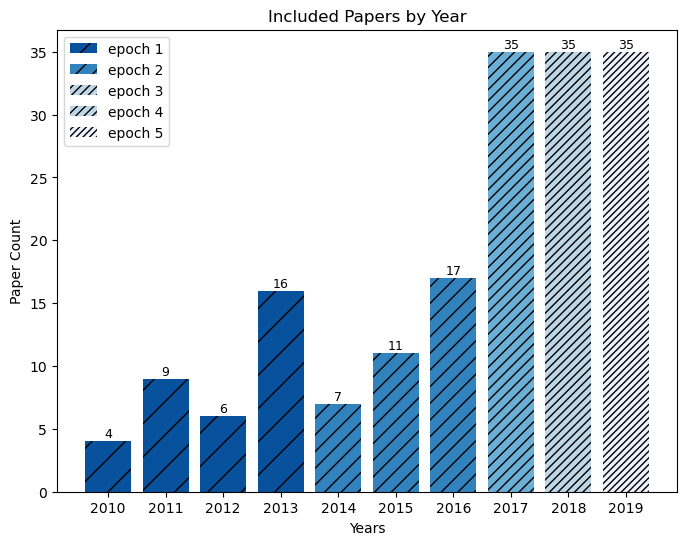

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot out Included Papers by Year 
fig, g2 = plt.subplots(figsize=(8, 6))
#g2.bar(I_Years_Count.Year,I_Years_Count.included_number,color="gray",align='center')
I_Years_Count['hatches'] = ['/', '/', '/', '/', '//', '//','//', '///', '////', '/////']
I_Years_Count['colors']=['#08519c','#08519c','#08519c','#08519c',
                        '#3182bd','#3182bd','#3182bd',
                        '#6baed6',
                        '#bdd7e7',
                        '#eff3ff']

print(I_Years_Count)
bars=g2.bar(I_Years_Count.Year,I_Years_Count.included_number,color=I_Years_Count.colors,align='center',label=I_Years_Count.epoch)

plt.ylabel("Paper Count")
plt.xlabel("Years")
g2.set_xticks(I_Years_Count.Year)
plt.title("Included Papers by Year")
for bar, hatch in zip(bars, I_Years_Count.hatches):  # loop over bars and hatches to set hatches in correct order
    bar.set_hatch(hatch)
for a,b in zip(I_Years_Count.Year,I_Years_Count.included_number):# add number on each bar 
    g2.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=9)

handles, labels = g2.get_legend_handles_labels()
labels=I_Years_Count.epoch
plt.legend([handles[0][0],handles[0][5],handles[0][8],handles[0][8],handles[0][9]], labels[[0,5,7,8,9]], loc='upper left')

plt.show()

#color & satuation the same group 

#### Extract Journals from included literature 

<BarContainer object of 10 artists>

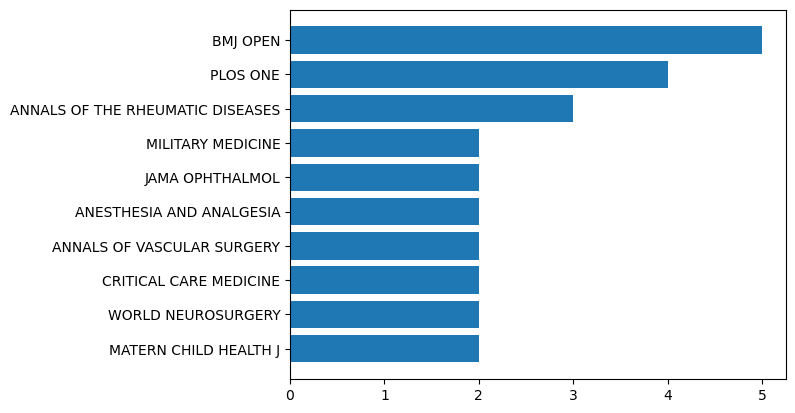

In [25]:

I_Journal=I_Papers.Journal.value_counts().reset_index().rename(columns={'index':'Journal_name','Journal':'paper_count'})
I_Journal
I_Top_10=I_Journal.head(10).sort_values('paper_count')
plt.barh(I_Top_10.Journal_name,I_Top_10.paper_count,align='center')

Extracted Journal Inpact factor information from Clarivate Journal Citation Report dataset( updated on June 30, 2021). https://jcr.clarivate.com/jcr/browse-journals 
Added Filter on 26,674 journals 
Categories:  
* Critical Care Medicine,
* Engineering, Biomedical, 
* Medical Informatics, 
* Medicine, General & Internal,
* Medicine, Research & Experimental, 
* Social Sciences, Biomedical, 
* Public, Environmental & Occupational Health,  
* Pediatrics
* Geriatrics & Gerontology  
* Allergy  
* Multidisciplinary Sciences  
* Emergency Medicine 
* Gastroenterology & Hepatology  
* Surgery  
* Anesthesiology  
* Rheumatology  
* Oncology  
* Orthopedics  
* Pharmacology & Pharmacy  
* Transplantation  
* Cardiac & Cardiovascular Systems  
* ENDOCRINOLOGY & METABOLISM 
* HEALTH CARE SCIENCES & SERVICES  
* OBSTETRICS & GYNECOLOGY 
* DERMATOLOGY  
* UROLOGY & NEPHROLOGY  
* OPHTHALMOLOGY  
* 
Citation Indexes:   
* Science Citation Index Expanded (SCIE)
* Social Science Citation Index (SSCI)
* Arts & Humanities Citation Index (AHCI)
* Emerging Sources Citation Index (ESCI)
get 728+376+176+66+37 Journals 


In [26]:
Journal_impact=pd.read_csv('/Users/chenyuli/Research_Thesis/Validate/20210707/ChenyuLi_JCR_JournalResults_07_2021.csv',header=0, encoding='unicode_escape')

# change Journal name to upper case -> for future journal impact mappin
for i in range(len(Journal_impact.Journal_name)):
    Journal_impact.Journal_name[i]=Journal_impact.Journal_name[i].upper()

Journal_impact

/var/folders/v0/r16j2f9545n7rrq_rvqlxn180000gn/T/ipykernel_11503/2224448575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Journal_impact.Journal_name[i]=Journal_impact.Journal_name[i].upper()


,ï»¿_ID,Journal_name,ISSN,eISSN,Category,Total_Citations,2020_JIF,JIF_Quartile,2020 _JCI,Percentage_of_OA_Gold
0,1,LANCET RESPIRATORY MEDICINE,2213-2600,NaN,CRITICAL CARE MEDICINE - SCIE,"22,278",30.70,Q1,6.48,10.36%
1,2,NATURE BIOMEDICAL ENGINEERING,2157-846X,2157-846X,"ENGINEERING, BIOMEDICAL - SCIE","6,476",25.67,Q1,5.42,0.80%
2,3,AMERICAN JOURNAL OF RESPIRATORY AND CRITICAL C...,1073-449X,1535-4970,CRITICAL CARE MEDICINE - SCIE,"76,608",21.41,Q1,4.09,11.41%
3,4,INTENSIVE CARE MEDICINE,0342-4642,1432-1238,CRITICAL CARE MEDICINE - SCIE,"33,510",17.44,Q1,3.08,20.89%
4,5,BIOACTIVE MATERIALS,NaN,2452-199X,"ENGINEERING, BIOMEDICAL - SCIE","2,145",14.59,Q1,1.69,100.00%
...,...,...,...,...,...,...,...,...,...,...
4730,4731,JOURNAL OF THE ASEAN FEDERATION OF ENDOCRINE S...,0857-1074,2308-118X,ENDOCRINOLOGY & METABOLISM - ESCI,43,NaN,NaN,0.03,100.00%
4731,4732,AUSTRIAN JOURNAL OF CLINICAL ENDOCRINOLOGY AND...,1998-7773,1998-7781,ENDOCRINOLOGY & METABOLISM - ESCI,16,NaN,NaN,0.03,58.57%
4732,4733,DIABETES & METABOLIC SYNDROME-CLINICAL RESEARC...,1871-4021,1878-0334,ENDOCRINOLOGY & METABOLISM - ESCI,"5,270",NaN,NaN,0.51,0.20%
4733,4734,REVISTA PORTUGUESA DE ENDOCRINOLOGIA DIABETES ...,1646-3439,1646-3439,ENDOCRINOLOGY & METABOLISM - ESCI,45,NaN,NaN,0.01,0.00%


In [27]:
Journal_impact

,ï»¿_ID,Journal_name,ISSN,eISSN,Category,Total_Citations,2020_JIF,JIF_Quartile,2020 _JCI,Percentage_of_OA_Gold
0,1,LANCET RESPIRATORY MEDICINE,2213-2600,NaN,CRITICAL CARE MEDICINE - SCIE,"22,278",30.70,Q1,6.48,10.36%
1,2,NATURE BIOMEDICAL ENGINEERING,2157-846X,2157-846X,"ENGINEERING, BIOMEDICAL - SCIE","6,476",25.67,Q1,5.42,0.80%
2,3,AMERICAN JOURNAL OF RESPIRATORY AND CRITICAL C...,1073-449X,1535-4970,CRITICAL CARE MEDICINE - SCIE,"76,608",21.41,Q1,4.09,11.41%
3,4,INTENSIVE CARE MEDICINE,0342-4642,1432-1238,CRITICAL CARE MEDICINE - SCIE,"33,510",17.44,Q1,3.08,20.89%
4,5,BIOACTIVE MATERIALS,NaN,2452-199X,"ENGINEERING, BIOMEDICAL - SCIE","2,145",14.59,Q1,1.69,100.00%
...,...,...,...,...,...,...,...,...,...,...
4730,4731,JOURNAL OF THE ASEAN FEDERATION OF ENDOCRINE S...,0857-1074,2308-118X,ENDOCRINOLOGY & METABOLISM - ESCI,43,NaN,NaN,0.03,100.00%
4731,4732,AUSTRIAN JOURNAL OF CLINICAL ENDOCRINOLOGY AND...,1998-7773,1998-7781,ENDOCRINOLOGY & METABOLISM - ESCI,16,NaN,NaN,0.03,58.57%
4732,4733,DIABETES & METABOLIC SYNDROME-CLINICAL RESEARC...,1871-4021,1878-0334,ENDOCRINOLOGY & METABOLISM - ESCI,"5,270",NaN,NaN,0.51,0.20%
4733,4734,REVISTA PORTUGUESA DE ENDOCRINOLOGIA DIABETES ...,1646-3439,1646-3439,ENDOCRINOLOGY & METABOLISM - ESCI,45,NaN,NaN,0.01,0.00%


In [28]:
Journal_list=articles.Journal
#Journal_list
#match_name=Journal_impact[Journal_impact.Journal_name.isin(I_Journal.Journal_name)]
#match.count()
match_ISSN=Journal_impact[Journal_impact.ISSN.isin(I_Papers.ISSN)]
match_ISSN.count()

ï»¿_ID                   181
Journal_name             181
ISSN                     181
eISSN                    175
Category                 181
Total_Citations          181
2020_JIF                 180
JIF_Quartile             180
2020 _JCI                181
Percentage_of_OA_Gold    181
dtype: int64

In [29]:
Match_Impact=I_Papers.merge(Journal_impact,how='left',on='ISSN')
Match_Impact
# duplicates are because of In Journal_Impact, there could be one journal name map to different category->as different record. 


,EndNote_ID,Article_Name,Abstract,Year,Journal,PubMed_ID,Language,DOI,ISSN,ï»¿_ID,Journal_name,eISSN,Category,Total_Citations,2020_JIF,JIF_Quartile,2020 _JCI,Percentage_of_OA_Gold
0,422,Evaluation of the quality of antenatal care us...,BACKGROUND: Evaluation of the quality of anten...,2014,BMC PREGNANCY AND CHILDBIRTH,24885103,eng,10.1186/1471-2393-14-168,1471-2393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,690,The effectiveness of varenicline versus nicoti...,BACKGROUND: There is limited evidence about th...,2017,INTERNATIONAL JOURNAL OF EPIDEMIOLOGY,29040555,eng,10.1093/ije/dyx109,0300-5771,1150.0,INTERNATIONAL JOURNAL OF EPIDEMIOLOGY,1464-3685,"PUBLIC, ENVIRONMENTAL & OCCUPATIONAL HEALTH - ...","30,944",7.20,Q1,2.70,41.02%
2,691,Development and validation of an ICD-10-based ...,BACKGROUND: There was no established disabilit...,2018,INJURY,29352592,eng,10.1016/j.injury.2017.12.021,0020-1383,85.0,INJURY-INTERNATIONAL JOURNAL OF THE CARE OF TH...,1879-0267,CRITICAL CARE MEDICINE - SCIE,"19,692",2.59,Q3,0.86,4.88%
3,691,Development and validation of an ICD-10-based ...,BACKGROUND: There was no established disabilit...,2018,INJURY,29352592,eng,10.1016/j.injury.2017.12.021,0020-1383,280.0,INJURY-INTERNATIONAL JOURNAL OF THE CARE OF TH...,1879-0267,CRITICAL CARE MEDICINE - SCIE,500,0.87,7.8,8.80,434
4,691,Development and validation of an ICD-10-based ...,BACKGROUND: There was no established disabilit...,2018,INJURY,29352592,eng,10.1016/j.injury.2017.12.021,0020-1383,445.0,INJURY-INTERNATIONAL JOURNAL OF THE CARE OF TH...,1879-0267,CRITICAL CARE MEDICINE - SCIE,"19,692",2.59,Q3,0.86,4.88%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,5792,Racial/ethnic differences in the prevalence of...,OBJECTIVE: To examine racial/ethnic difference...,2013,DIABETES CARE,23238659,eng,10.2337/dc12-0951,0149-5992,3137.0,DIABETES CARE,1935-5548,ENDOCRINOLOGY & METABOLISM - SCIE,"85,997",19.11,Q1,3.63,0.20%
255,5792,Racial/ethnic differences in the prevalence of...,OBJECTIVE: To examine racial/ethnic difference...,2013,DIABETES CARE,23238659,eng,10.2337/dc12-0951,0149-5992,4467.0,DIABETES CARE,1935-5548,ENDOCRINOLOGY & METABOLISM - SCIE,"85,997",19.11,Q1,3.63,0.20%
256,5805,Synchronization of administrations of chemothe...,PURPOSE: The erythropoiesis-stimulating agents...,2013,SUPPORTIVE CARE IN CANCER,23756616,eng,10.1007/s00520-013-1830-7,0941-4355,2528.0,SUPPORTIVE CARE IN CANCER,1433-7339,ONCOLOGY - SCIE,"18,289",3.60,Q3,1.12,14.60%
257,5805,Synchronization of administrations of chemothe...,PURPOSE: The erythropoiesis-stimulating agents...,2013,SUPPORTIVE CARE IN CANCER,23756616,eng,10.1007/s00520-013-1830-7,0941-4355,3600.0,SUPPORTIVE CARE IN CANCER,1433-7339,HEALTH CARE SCIENCES & SERVICES - SCIE,"18,289",3.60,Q2,1.12,14.60%


In [30]:
#check mapped test 
mapped=I_Papers.merge(Journal_impact,how='inner',on='ISSN').sort_values("2020_JIF",ascending=False)
mapped

,EndNote_ID,Article_Name,Abstract,Year,Journal,PubMed_ID,Language,DOI,ISSN,ï»¿_ID,Journal_name,eISSN,Category,Total_Citations,2020_JIF,JIF_Quartile,2020 _JCI,Percentage_of_OA_Gold
157,4012,Long-term outcomes of endoscopic resection and...,BACKGROUND AND AIMS: Endoscopic resection (ER)...,2019,GASTROINTESTINAL ENDOSCOPY,30576649,eng,10.1016/j.gie.2018.12.010,0016-5107,1932,GASTROINTESTINAL ENDOSCOPY,1097-6779,GASTROENTEROLOGY & HEPATOLOGY - SCIE,"28,955",9.43,Q1,1.59,2.45%
38,1506,Recurrent antibiotic exposure may promote canc...,BACKGROUND: Bacterial dysbiosis was previously...,2015,EUROPEAN JOURNAL OF CANCER,26338196,eng,10.1016/j.ejca.2015.08.015,0959-8049,2387,EUROPEAN JOURNAL OF CANCER,1879-0852,ONCOLOGY - SCIE,"40,294",9.16,Q1,1.63,21.52%
217,5661,Hospital Utilization Among Rural Children Serv...,IMPORTANCE: Telemedicine is increasingly used ...,2019,JAMA NETW OPEN,31418803,eng,10.1001/jamanetworkopen.2019.9364,2574-3805,504,JAMA NETWORK OPEN,2574-3805,"MEDICINE, GENERAL & INTERNAL - SCIE","12,653",8.48,Q1,2.65,100.00%
64,2012,The Diagnosis-Wide Landscape of Hospital-Acqui...,BACKGROUND AND OBJECTIVES: The exploration of ...,2017,CLINICAL JOURNAL OF THE AMERICAN SOCIETY OF NE...,28495862,eng,10.2215/cjn.10981016,1555-9041,3899,CLINICAL JOURNAL OF THE AMERICAN SOCIETY OF NE...,1555-905X,UROLOGY & NEPHROLOGY - SCIE,"21,638",8.24,Q1,2.37,0.63%
65,2012,The Diagnosis-Wide Landscape of Hospital-Acqui...,BACKGROUND AND OBJECTIVES: The exploration of ...,2017,CLINICAL JOURNAL OF THE AMERICAN SOCIETY OF NE...,28495862,eng,10.2215/cjn.10981016,1555-9041,4106,CLINICAL JOURNAL OF THE AMERICAN SOCIETY OF NE...,1555-905X,UROLOGY & NEPHROLOGY - SCIE,"21,638",8.24,Q1,2.37,0.63%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,1812,"Effectiveness, safety and costs of thromboembo...",PURPOSE: Atrial fibrillation is the most commo...,2016,BMJ OPEN,26823179,eng,10.1136/bmjopen-2015-010144,2044-6055,262,BMJ OPEN,2044-6055,"MEDICINE, GENERAL & INTERNAL - SCIE",3266,0.82,3.8,6.80,2686
89,2696,Abdominal and Pelvic Vascular Injury: A Nation...,The aim of this study was to characterize the ...,2019,AMERICAN SURGEON,30947777,eng,,0003-1348,2217,AMERICAN SURGEON,1555-9823,SURGERY - SCIE,"6,964",0.69,Q4,0.24,0.22%
214,5567,Comparison of intraoperative basal fluid requi...,There has been recent progress in intraoperati...,2017,MEDICINE (BALTIMORE),29381975,eng,10.1097/md.0000000000008763,0025-7974,357,MEDICINE,1536-5964,"MEDICINE, GENERAL & INTERNAL - SCIE",5078,0.68,3.8,7.00,3453
160,4086,Achieving serum urate goal: a comparative effe...,BACKGROUND: Febuxostat is recommended as 1 of ...,2014,POSTGRADUATE MEDICINE,24685969,eng,10.3810/pgm.2014.03.2741,0032-5481,176,POSTGRADUATE MEDICINE,1941-9260,"MEDICINE, GENERAL & INTERNAL - SCIE",164,0.63,6,5.30,104


In [31]:
# check didn't matched
IsNotIN=I_Papers[I_Papers.EndNote_ID.isin(set(I_Papers.EndNote_ID)-set(mapped.EndNote_ID))]
IsNotIN

,EndNote_ID,Article_Name,Abstract,Year,Journal,PubMed_ID,Language,DOI,ISSN
421,422,Evaluation of the quality of antenatal care us...,BACKGROUND: Evaluation of the quality of anten...,2014,BMC PREGNANCY AND CHILDBIRTH,24885103,eng,10.1186/1471-2393-14-168,1471-2393
900,901,Prediction of mortality in patients undergoing...,BACKGROUND/AIMS: Many patients with end-stage ...,2011,NEPHRON: CLINICAL PRACTICE,21071962,eng,10.1159/000321525,1660-2110
927,928,"Primary Nonadherence, Associated Clinical Outc...",BACKGROUND: Adherence to biologic disease-modi...,2016,J MANAG CARE SPEC PHARM,27003550,eng,10.18553/jmcp.2016.22.3.209,
1128,1129,Identifying Risk of Future Asthma Attacks Usin...,"BACKGROUND: Asthma attacks are common, serious...",2017,J ALLERGY CLIN IMMUNOL PRACT,28017629,eng,10.1016/j.jaip.2016.11.007,
1229,1230,Risk of moderate to advanced kidney disease in...,OBJECTIVE: To determine the risk of chronic ki...,2013,BMJ,24129480,eng,10.1136/bmj.f5961,0959-8138
1665,1666,Effect of cardiac rehabilitation referral stra...,BACKGROUND: Although cardiac rehabilitation (C...,2011,ARCHIVES OF INTERNAL MEDICINE,21325114,eng,10.1001/archinternmed.2010.501,0003-9926
1821,1822,The use of a standardized order set reduces sy...,BACKGROUND: Systemic corticosteroids (SC) are ...,2018,INTERNATIONAL JOURNAL OF CHRONIC OBSTRUCTIVE P...,30100717,eng,10.2147/copd.S165665,1176-9106
1900,1901,Clinical utility of the revised cardiac risk i...,OBJECTIVES: The revised Cardiac Risk Index (RC...,2018,CLINICAL INTERVENTIONS IN AGING,29317808,eng,10.2147/cia.S144832,1176-9092
2392,2393,"Impact of deprivation, ethnicity, and insulin ...",BACKGROUND: There is marked variation in diabe...,2017,PEDIATRIC DIABETES,27534520,eng,10.1111/pedi.12407,1399-543x
3042,3043,Rate of bone density change does not enhance f...,CONTEXT: There is contradictory information on...,2012,JOURNAL OF CLINICAL ENDOCRINOLOGY AND METABOLISM,22278427,eng,10.1210/jc.2011-2871,0021-972x


In [32]:

testMergedResults=Match_Impact[Match_Impact.EndNote_ID.isin(IsNotIN.EndNote_ID)]
testMergedResults.Journal

0                           BMC PREGNANCY AND CHILDBIRTH
12                            NEPHRON: CLINICAL PRACTICE
16                               J MANAG CARE SPEC PHARM
18                          J ALLERGY CLIN IMMUNOL PRACT
20                                                   BMJ
36                         ARCHIVES OF INTERNAL MEDICINE
43     INTERNATIONAL JOURNAL OF CHRONIC OBSTRUCTIVE P...
46                       CLINICAL INTERVENTIONS IN AGING
66                                    PEDIATRIC DIABETES
102     JOURNAL OF CLINICAL ENDOCRINOLOGY AND METABOLISM
103                             GULF JOURNAL OF ONCOLOGY
107                JOURNAL OF HEAD TRAUMA REHABILITATION
129          JOURNAL OF ORTHOPAEDIC SURGERY AND RESEARCH
147                         JOURNAL OF ADOLESCENT HEALTH
148                                         HOSP PEDIATR
154                         INTERNATIONAL DENTAL JOURNAL
158                          JOURNAL OF CLINICAL NURSING
159                          WO

In [33]:
#test MERICAN JOURNAL OF ALZHEIMERS DISEASE AND OTHER DEMENTIAS 
Journal_impact[Journal_impact.Journal_name=="AMERICAN JOURNAL OF ALZHEIMERS DISEASE AND OTHER DEMENTIAS"]
I_Journal[I_Journal.Journal_name=="AMERICAN JOURNAL OF ALZHEIMER'S DISEASE AND OTHER DEMENTIAS"]

,Journal_name,paper_count
134,AMERICAN JOURNAL OF ALZHEIMER'S DISEASE AND OT...,1


In [34]:

Journal_impact[Journal_impact.Journal_name=="ARTHRITIS & RHEUMATOLOGY"]

,ï»¿_ID,Journal_name,ISSN,eISSN,Category,Total_Citations,2020_JIF,JIF_Quartile,2020 _JCI,Percentage_of_OA_Gold
2378,2379,ARTHRITIS & RHEUMATOLOGY,2326-5191,2326-5205,RHEUMATOLOGY - SCIE,"16,730",11.00,Q1,2.71,21.67%


In [35]:
I_Journal[I_Journal.Journal_name=="ARTHRITIS RHEUMATOL"]

,Journal_name,paper_count
72,ARTHRITIS RHEUMATOL,1


In [36]:
Not_In_I_Journal=set(I_Papers.ISSN)-set(match_ISSN)
print(len(Not_In_I_Journal))
test=I_Papers[I_Papers.ISSN.isin(Not_In_I_Journal)]
test

143


,EndNote_ID,Article_Name,Abstract,Year,Journal,PubMed_ID,Language,DOI,ISSN
421,422,Evaluation of the quality of antenatal care us...,BACKGROUND: Evaluation of the quality of anten...,2014,BMC PREGNANCY AND CHILDBIRTH,24885103,eng,10.1186/1471-2393-14-168,1471-2393
689,690,The effectiveness of varenicline versus nicoti...,BACKGROUND: There is limited evidence about th...,2017,INTERNATIONAL JOURNAL OF EPIDEMIOLOGY,29040555,eng,10.1093/ije/dyx109,0300-5771
690,691,Development and validation of an ICD-10-based ...,BACKGROUND: There was no established disabilit...,2018,INJURY,29352592,eng,10.1016/j.injury.2017.12.021,0020-1383
699,700,Cost Savings from Reducing Pain Through the De...,OBJECTIVES: An important task facing hospitals...,2018,JOURNAL OF ALTERNATIVE AND COMPLEMENTARY MEDICINE,29474095,eng,10.1089/acm.2017.0203,1075-5535
729,730,The clinical epidemiology of fatigue in newly ...,BACKGROUND: Fatigue is a common and distressin...,2017,BMC CARDIOVASCULAR DISORDERS,28490326,eng,10.1186/s12872-017-0555-9,1471-2261
...,...,...,...,...,...,...,...,...,...
5782,5783,Association Between Positive Cultures During A...,The number of patients with cancer being admit...,2018,CANCER CONTROL,30086666,eng,10.1177/1073274818794162,1073-2748
5789,5790,Zolpidem is independently associated with incr...,BACKGROUND: Inpatient falls are associated wit...,2013,JOURNAL OF HOSPITAL MEDICINE,23165956,eng,10.1002/jhm.1985,1553-5592
5791,5792,Racial/ethnic differences in the prevalence of...,OBJECTIVE: To examine racial/ethnic difference...,2013,DIABETES CARE,23238659,eng,10.2337/dc12-0951,0149-5992
5804,5805,Synchronization of administrations of chemothe...,PURPOSE: The erythropoiesis-stimulating agents...,2013,SUPPORTIVE CARE IN CANCER,23756616,eng,10.1007/s00520-013-1830-7,0941-4355


In [37]:
# change all name into upper case 
for i in range(len(I_Journal.Journal_name)):
    I_Journal.Journal_name[i]=I_Journal.Journal_name[i].upper()
print(I_Journal)

                         Journal_name  paper_count
0                            BMJ OPEN            5
1                            PLOS ONE            4
2    ANNALS OF THE RHEUMATIC DISEASES            3
3               MATERN CHILD HEALTH J            2
4                  WORLD NEUROSURGERY            2
..                                ...          ...
140                           SURGERY            1
141                      SCAND J UROL            1
142                PEDIATRIC DIABETES            1
143        PREVENTING CHRONIC DISEASE            1
144              CLINICAL LUNG CANCER            1

[145 rows x 2 columns]


/var/folders/v0/r16j2f9545n7rrq_rvqlxn180000gn/T/ipykernel_11503/3504582545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  I_Journal.Journal_name[i]=I_Journal.Journal_name[i].upper()


## Step 6 Analyze Numerator

In [38]:
# Read Method_Review data
Method_Review_Sensitivity=pd.read_excel('/Users/chenyuli/Research_Thesis/validate/SensitivityAnalysis/MethodREview0228.xlsx')
#Method_Review=pd.read_csv('/Users/chenyuli/Research_Thesis/Validate/20210707/20210707_method_review.csv')
#AR_Include=Method_Review[Method_Review.Include_in_Research=='Yes']
#Method_Review=Method_Review[Method_Review.EndNote_ID.isin(AR_Include.EndNote_Index)]
Method_Sensitivity = Method_Review_Sensitivity[Method_Review_Sensitivity.EndNote_ID.isin(AR_Include.EndNote_Index)]

In [39]:
Method_Sensitivity.head(5)

,EndNote_ID,Pubmed_ID,Analytic_Method_Name,Real_World_Evidence,Unnamed: 4
0,1230,24129480,Cox proportional hazard models,0,2013
1,1230,24129480,Sensitivity analysis,Sensitivity analysis,2013
2,1564,21694510,Sensitivity analysis,Sensitivity analysis,2011
3,1564,21694510,Statistic testing,0,2011
4,1564,21694510,Multivariate Logistic Regression,0,2011


In [40]:
# Real_World_Method_list=Method_Review[Method_Review.Real_World_Evidence!='0'].EndNote_ID.unique()
# len(Real_World_Method_list)

In [41]:
RWM_Sensitivity_list = Method_Sensitivity[Method_Sensitivity.Real_World_Evidence!=0].EndNote_ID.unique()
len(RWM_Sensitivity_list)

59

### Start using Method_Sensitivity data

In [42]:
RW_Methods_Papers=articles[articles['EndNote_ID'].isin(RWM_Sensitivity_list)]
RW_Methods_Papers.head(5)

,EndNote_ID,Article_Name,Abstract,Year,Journal,PubMed_ID,Language,DOI,ISSN
689,690,The effectiveness of varenicline versus nicoti...,BACKGROUND: There is limited evidence about th...,2017,INTERNATIONAL JOURNAL OF EPIDEMIOLOGY,29040555,eng,10.1093/ije/dyx109,0300-5771
774,775,Assessment of the relationship between diabete...,AIMS: Assess the relationship between timely t...,2018,PLOS ONE,29894495,eng,10.1371/journal.pone.0199011,1932-6203
803,804,Type and timing of heralding in ST-elevation a...,AIMS: It is widely thought that ST-elevation m...,2013,EUR HEART J ACUTE CARDIOVASC CARE,24222835,eng,10.1177/2048872613487495,2048-8726
956,957,Statin use and the risk of colorectal cancer i...,There is extensive debate regarding the protec...,2019,SCIENTIFIC REPORTS,31537841,eng,10.1038/s41598-019-49877-5,2045-2322
1219,1220,Low-dose aspirin and risk of upper/lower gastr...,Introduction: Risks of low-dose aspirin-associ...,2019,ANNALS OF MEDICINE,31025592,eng,10.1080/07853890.2019.1591635,0785-3890


In [43]:
Sensitivity_Analysis_list=Method_Sensitivity[Method_Sensitivity.Real_World_Evidence=='Sensitivity analysis'].EndNote_ID.unique()
print(len(Sensitivity_Analysis_list))
Sensitivity_Papers=articles[articles['EndNote_ID'].isin(Sensitivity_Analysis_list)]
Sensitivity_Papers.head(5)

31


,EndNote_ID,Article_Name,Abstract,Year,Journal,PubMed_ID,Language,DOI,ISSN
689,690,The effectiveness of varenicline versus nicoti...,BACKGROUND: There is limited evidence about th...,2017,INTERNATIONAL JOURNAL OF EPIDEMIOLOGY,29040555,eng,10.1093/ije/dyx109,0300-5771
774,775,Assessment of the relationship between diabete...,AIMS: Assess the relationship between timely t...,2018,PLOS ONE,29894495,eng,10.1371/journal.pone.0199011,1932-6203
803,804,Type and timing of heralding in ST-elevation a...,AIMS: It is widely thought that ST-elevation m...,2013,EUR HEART J ACUTE CARDIOVASC CARE,24222835,eng,10.1177/2048872613487495,2048-8726
1229,1230,Risk of moderate to advanced kidney disease in...,OBJECTIVE: To determine the risk of chronic ki...,2013,BMJ,24129480,eng,10.1136/bmj.f5961,0959-8138
1457,1458,Does Angiotensin-Converting Enzyme Inhibitor a...,STUDY OBJECTIVE: It has been suggested that us...,2016,PHARMACOTHERAPY,26846893,eng,10.1002/phar.1704,0277-0008


In [44]:
Method_Sensitivity.Real_World_Evidence.value_counts()

0                       318
Real-World Evidence      32
Sensitivity analysis     31
?                        16
Missing                   1
Name: Real_World_Evidence, dtype: int64

In [45]:
RWM_Analysis_list=Method_Sensitivity[Method_Sensitivity.Real_World_Evidence=='Real-World Evidence'].EndNote_ID.unique()
print(len(RWM_Analysis_list))
RWM_Papers=articles[articles['EndNote_ID'].isin(RWM_Analysis_list)]
RWM_Papers.head(5)

27


,EndNote_ID,Article_Name,Abstract,Year,Journal,PubMed_ID,Language,DOI,ISSN
689,690,The effectiveness of varenicline versus nicoti...,BACKGROUND: There is limited evidence about th...,2017,INTERNATIONAL JOURNAL OF EPIDEMIOLOGY,29040555,eng,10.1093/ije/dyx109,0300-5771
956,957,Statin use and the risk of colorectal cancer i...,There is extensive debate regarding the protec...,2019,SCIENTIFIC REPORTS,31537841,eng,10.1038/s41598-019-49877-5,2045-2322
1219,1220,Low-dose aspirin and risk of upper/lower gastr...,Introduction: Risks of low-dose aspirin-associ...,2019,ANNALS OF MEDICINE,31025592,eng,10.1080/07853890.2019.1591635,0785-3890
1278,1279,Angiotensin receptor blockers: are they relate...,INTRODUCTION: Angiotensin receptor blockers (A...,2013,JOURNAL OF HYPERTENSION,23822929,eng,10.1097/HJH.0b013e3283621ea3,0263-6352
1457,1458,Does Angiotensin-Converting Enzyme Inhibitor a...,STUDY OBJECTIVE: It has been suggested that us...,2016,PHARMACOTHERAPY,26846893,eng,10.1002/phar.1704,0277-0008


In [46]:
ExtraCredit_Analysis_list=Method_Sensitivity[Method_Sensitivity.Real_World_Evidence=='?'].EndNote_ID.unique()
print(len(ExtraCredit_Analysis_list))
ExtraCredit_Papers=articles[articles['EndNote_ID'].isin(ExtraCredit_Analysis_list)]
ExtraCredit_Papers.head(5)

16


,EndNote_ID,Article_Name,Abstract,Year,Journal,PubMed_ID,Language,DOI,ISSN
774,775,Assessment of the relationship between diabete...,AIMS: Assess the relationship between timely t...,2018,PLOS ONE,29894495,eng,10.1371/journal.pone.0199011,1932-6203
803,804,Type and timing of heralding in ST-elevation a...,AIMS: It is widely thought that ST-elevation m...,2013,EUR HEART J ACUTE CARDIOVASC CARE,24222835,eng,10.1177/2048872613487495,2048-8726
1665,1666,Effect of cardiac rehabilitation referral stra...,BACKGROUND: Although cardiac rehabilitation (C...,2011,ARCHIVES OF INTERNAL MEDICINE,21325114,eng,10.1001/archinternmed.2010.501,0003-9926
1786,1787,Predicting Nonmuscle Invasive Bladder Cancer R...,PURPOSE: We assessed the performance of the EO...,2017,JOURNAL OF UROLOGY,28433642,eng,10.1016/j.juro.2017.04.077,0022-5347
1811,1812,"Effectiveness, safety and costs of thromboembo...",PURPOSE: Atrial fibrillation is the most commo...,2016,BMJ OPEN,26823179,eng,10.1136/bmjopen-2015-010144,2044-6055


In [47]:
set(ExtraCredit_Analysis_list)-set(Sensitivity_Analysis_list)

{1666, 1787, 2012, 2148, 2393, 3087, 3093, 5219, 5740, 5805}

/Users/chenyuli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='RWM_count'>

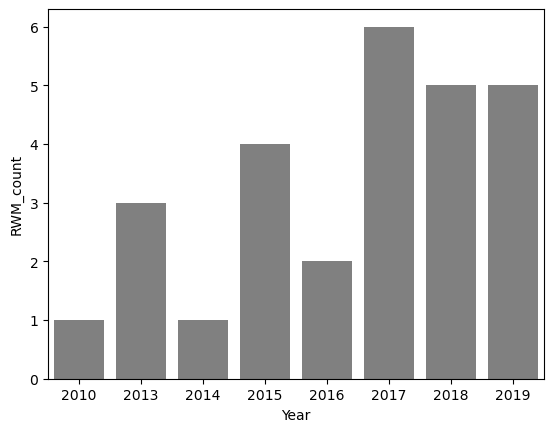

In [48]:
RWM_Years=RWM_Papers['Year']
RWM_Years_Count=RWM_Years.value_counts().reset_index().rename(columns={'index':'Year','Year':'RWM_count'})
RWM_Years_Count.sort_values('Year')
sns.barplot(RWM_Years_Count.Year,RWM_Years_Count.RWM_count,color='gray')

/Users/chenyuli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Sensitivity_Analysis_Count'>

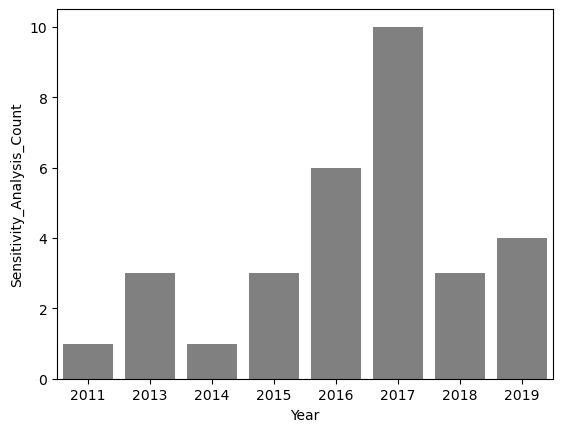

In [49]:
S_Years=Sensitivity_Papers['Year']
S_Years_Count=S_Years.value_counts().reset_index().rename(columns={'index':'Year','Year':'Sensitivity_Analysis_Count'})
S_Years_Count.sort_values('Year')
sns.barplot(S_Years_Count.Year,S_Years_Count.Sensitivity_Analysis_Count,color='gray')

/Users/chenyuli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Potential_RWM_Count'>

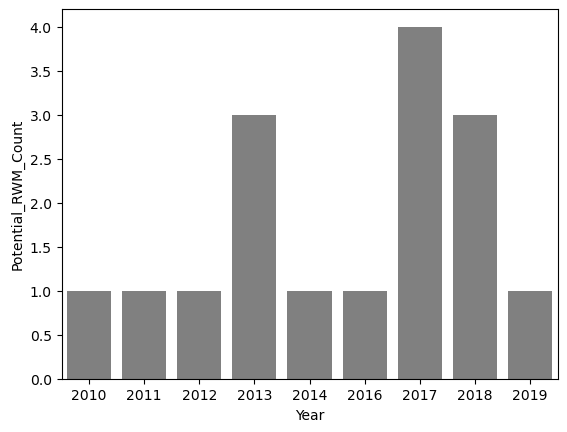

In [50]:
ExtraCredit_Years=ExtraCredit_Papers['Year']
ExtraCredit_Years_Count=ExtraCredit_Years.value_counts().reset_index().rename(columns={'index':'Year','Year':'Potential_RWM_Count'})
ExtraCredit_Years_Count.sort_values('Year')
sns.barplot(ExtraCredit_Years_Count.Year,ExtraCredit_Years_Count.Potential_RWM_Count,color='gray')

81


/Users/chenyuli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Mentioned_Missingness_count'>

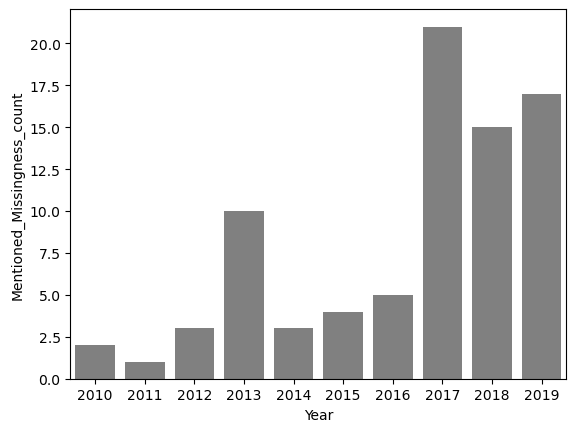

In [51]:
# Mentioned Missing Analysis
MM_list=Article_Review[(Article_Review.Include_in_Research=='Yes')&(Article_Review.Mention_Missing_Data!="No")].EndNote_Index
print(len(MM_list))

#M means Missing, the papers are handled missing data papers 
MM_Papers=articles[articles['EndNote_ID'].isin(MM_list)]
MM_Years=MM_Papers['Year']
MM_Years_Count=MM_Years.value_counts().reset_index().rename(columns={'index':'Year','Year':'Mentioned_Missingness_count'})
MM_Years_Count.sort_values('Year')
#Plot
sns.barplot(MM_Years_Count.Year,MM_Years_Count.Mentioned_Missingness_count,color='gray')

39


/Users/chenyuli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Assessed_Missingness_count'>

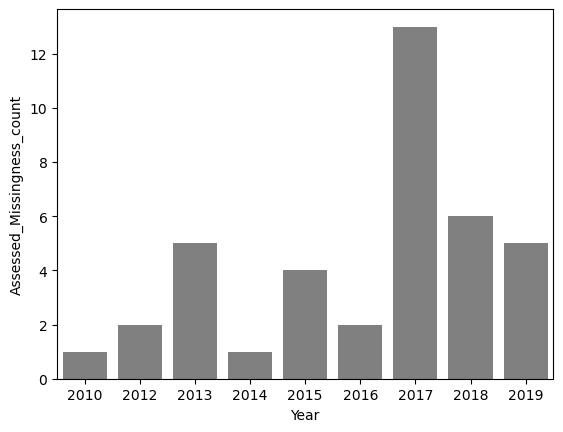

In [52]:
#Missing data analysis 
HM_list=Article_Review[(Article_Review.Include_in_Research=='Yes')&(Article_Review.Assessed_Missing_Data!="No")].EndNote_Index
print(len(HM_list))
HM_Papers=articles[articles['EndNote_ID'].isin(HM_list)]
HM_Years=HM_Papers['Year']
HM_Years_Count=HM_Years.value_counts().reset_index().rename(columns={'index':'Year','Year':'Assessed_Missingness_count'})
HM_Years_Count.sort_values('Year')
#Plot
sns.barplot(HM_Years_Count.Year,HM_Years_Count.Assessed_Missingness_count,color='gray')

/Users/chenyuli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Combined_RWM_Count'>

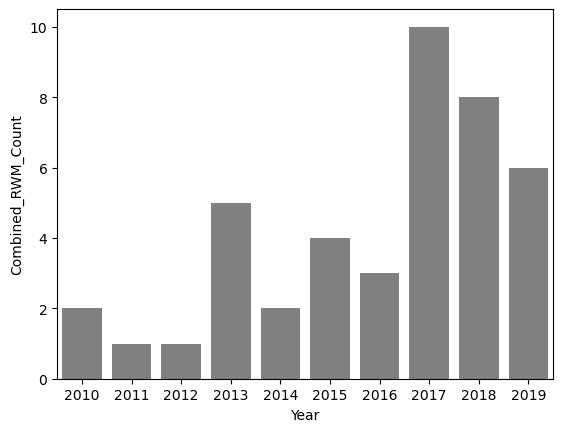

In [53]:
# Combine Extracredit & RWM
Combined_RWM_list = set(ExtraCredit_Analysis_list)|set(RWM_Analysis_list)
Combined_RWM_Papers=articles[articles['EndNote_ID'].isin(Combined_RWM_list)]
Combined_RWM_Years=Combined_RWM_Papers['Year']
Combined_RWM_Years_Count=Combined_RWM_Years.value_counts().reset_index().rename(columns={'index':'Year','Year':'Combined_RWM_Count'})
Combined_RWM_Years_Count.sort_values('Year')
#Plot
sns.barplot(Combined_RWM_Years_Count.Year,Combined_RWM_Years_Count.Combined_RWM_Count,color='gray')

In [54]:
len(Combined_RWM_list)

42

In [55]:
Join_RWP_I=I_Years_Count+RWM_Years_Count

In [56]:
I_Years_Count.sort_values('Year')

,index,Year,included_number,epoch,hatches,colors
0,9,2010,4,epoch 1,/,#08519c
1,6,2011,9,epoch 1,/,#08519c
2,8,2012,6,epoch 1,/,#08519c
3,4,2013,16,epoch 1,/,#08519c
4,7,2014,7,epoch 2,//,#3182bd
5,5,2015,11,epoch 2,//,#3182bd
6,3,2016,17,epoch 2,//,#3182bd
7,0,2017,35,epoch 3,///,#6baed6
8,1,2018,35,epoch 4,////,#bdd7e7
9,2,2019,35,epoch 5,/////,#eff3ff


In [57]:
Join_RWM_I=pd.concat([I_Years_Count,RWM_Years_Count],ignore_index=True,sort=True)

In [58]:
Join_RWM_I= pd.merge(I_Years_Count,RWM_Years_Count,on='Year',how='left').fillna(0)
Join_RWM_I.head(5)

,index,Year,included_number,epoch,hatches,colors,RWM_count
0,9,2010,4,epoch 1,/,#08519c,1.0
1,6,2011,9,epoch 1,/,#08519c,0.0
2,8,2012,6,epoch 1,/,#08519c,0.0
3,4,2013,16,epoch 1,/,#08519c,3.0
4,7,2014,7,epoch 2,//,#3182bd,1.0


In [59]:
### Papers used any of three phases 
Any_three_phases = set(RWM_Analysis_list)| set(HM_list) |set(Sensitivity_Analysis_list)
print(len(Any_three_phases))
All_three_phases = set(RWM_Analysis_list) & set(HM_list) & set(Sensitivity_Analysis_list)
print(len(All_three_phases))

70
5


In [60]:
print(len(RWM_Analysis_list))
print(len(HM_list))
print(len(Sensitivity_Analysis_list))

27
39
31


In [61]:
#Mentioned & assesed missing
Combined_missing_list=set(MM_list) | set(HM_list)
print(len(Combined_missing_list))

81


In [62]:
set(HM_list)-set(MM_list) 

set()

In [63]:
Graph_Years=I_Years_Count.sort_values("Year").merge(MM_Years_Count,on='Year',how="left").merge(HM_Years_Count,on='Year',how="left").merge(RWM_Years_Count,on='Year',how='left').merge(S_Years_Count,on='Year',how='left').merge(ExtraCredit_Years_Count, on = 'Year', how = 'left').merge(Combined_RWM_Years_Count, on = 'Year',how = 'left').fillna(0)
Graph_Years

# Add Combined missingness : assess +Mentioned 

,index,Year,included_number,epoch,hatches,colors,Mentioned_Missingness_count,Assessed_Missingness_count,RWM_count,Sensitivity_Analysis_Count,Potential_RWM_Count,Combined_RWM_Count
0,9,2010,4,epoch 1,/,#08519c,2,1.0,1.0,0.0,1.0,2
1,6,2011,9,epoch 1,/,#08519c,1,0.0,0.0,1.0,1.0,1
2,8,2012,6,epoch 1,/,#08519c,3,2.0,0.0,0.0,1.0,1
3,4,2013,16,epoch 1,/,#08519c,10,5.0,3.0,3.0,3.0,5
4,7,2014,7,epoch 2,//,#3182bd,3,1.0,1.0,1.0,1.0,2
5,5,2015,11,epoch 2,//,#3182bd,4,4.0,4.0,3.0,0.0,4
6,3,2016,17,epoch 2,//,#3182bd,5,2.0,2.0,6.0,1.0,3
7,0,2017,35,epoch 3,///,#6baed6,21,13.0,6.0,10.0,4.0,10
8,1,2018,35,epoch 4,////,#bdd7e7,15,6.0,5.0,3.0,3.0,8
9,2,2019,35,epoch 5,/////,#eff3ff,17,5.0,5.0,4.0,1.0,6


In [64]:
Graph_Years['RWM_%']=Graph_Years.RWM_count/Graph_Years.included_number
Graph_Years['MM_%']=Graph_Years.Mentioned_Missingness_count/Graph_Years.included_number
Graph_Years['HM_%']=Graph_Years.Assessed_Missingness_count/Graph_Years.included_number
Graph_Years['Sensitivity_analysis_%']=Graph_Years.Sensitivity_Analysis_Count/Graph_Years.included_number
Graph_Years['Potential_RWM_Count_%']=Graph_Years.Potential_RWM_Count/Graph_Years.included_number
Graph_Years['Combined_RWM_Count_%']=Graph_Years.Combined_RWM_Count/Graph_Years.included_number

In [65]:
Graph_Years

,index,Year,included_number,epoch,hatches,colors,Mentioned_Missingness_count,Assessed_Missingness_count,RWM_count,Sensitivity_Analysis_Count,Potential_RWM_Count,Combined_RWM_Count,RWM_%,MM_%,HM_%,Sensitivity_analysis_%,Potential_RWM_Count_%,Combined_RWM_Count_%
0,9,2010,4,epoch 1,/,#08519c,2,1.0,1.0,0.0,1.0,2,0.250000,0.500000,0.250000,0.000000,0.250000,0.500000
1,6,2011,9,epoch 1,/,#08519c,1,0.0,0.0,1.0,1.0,1,0.000000,0.111111,0.000000,0.111111,0.111111,0.111111
2,8,2012,6,epoch 1,/,#08519c,3,2.0,0.0,0.0,1.0,1,0.000000,0.500000,0.333333,0.000000,0.166667,0.166667
3,4,2013,16,epoch 1,/,#08519c,10,5.0,3.0,3.0,3.0,5,0.187500,0.625000,0.312500,0.187500,0.187500,0.312500
4,7,2014,7,epoch 2,//,#3182bd,3,1.0,1.0,1.0,1.0,2,0.142857,0.428571,0.142857,0.142857,0.142857,0.285714
5,5,2015,11,epoch 2,//,#3182bd,4,4.0,4.0,3.0,0.0,4,0.363636,0.363636,0.363636,0.272727,0.000000,0.363636
6,3,2016,17,epoch 2,//,#3182bd,5,2.0,2.0,6.0,1.0,3,0.117647,0.294118,0.117647,0.352941,0.058824,0.176471
7,0,2017,35,epoch 3,///,#6baed6,21,13.0,6.0,10.0,4.0,10,0.171429,0.600000,0.371429,0.285714,0.114286,0.285714
8,1,2018,35,epoch 4,////,#bdd7e7,15,6.0,5.0,3.0,3.0,8,0.142857,0.428571,0.171429,0.085714,0.085714,0.228571
9,2,2019,35,epoch 5,/////,#eff3ff,17,5.0,5.0,4.0,1.0,6,0.142857,0.485714,0.142857,0.114286,0.028571,0.171429


In [66]:
RWE_or_S_List=list(set(RWM_Analysis_list) | set(Sensitivity_Analysis_list))
RWE_or_S_Papers=articles[articles['EndNote_ID'].isin(RWE_or_S_List)]
RS_Years=RWE_or_S_Papers['Year']
RS_Years_Count=RS_Years.value_counts().reset_index().rename(columns={'index':'Year','Year':'Sensitivity_analysis_or Real-World_Methods_Count'})
RS_Years_Count.sort_values('Year')

,Year,Sensitivity_analysis_or Real-World_Methods_Count
8,2010,1
7,2011,1
3,2013,6
6,2014,2
5,2015,5
4,2016,6
0,2017,14
1,2018,7
2,2019,7


In [67]:
RWE_or_S_Litst_or_HM_list = set(RWM_Analysis_list)|set(Sensitivity_Analysis_list)|set(HM_list)
RWE_or_S_Litst_or_HM_list=S_Years.value_counts().reset_index().rename(columns={'index':'Year','Year':'All three components'})
RS_Years_Count.sort_values('Year') #50 /175 = 28.6%

,Year,Sensitivity_analysis_or Real-World_Methods_Count
8,2010,1
7,2011,1
3,2013,6
6,2014,2
5,2015,5
4,2016,6
0,2017,14
1,2018,7
2,2019,7


In [68]:
Traditional_regression_list=[1564	,
4297	,
3532	,
3484	,
4492	,
3697	,
4678	,
3197	,
1259	,
1717	,
3648	,
4782	,
1449	,
3576	,
3080	,
2463	,
4634	,
1220	,
2696	,
957	,
1835	,
1901	,
4362	,
4427	,
2212	,
4926	,
1930	,
4857	,
1822	,
700	,
3497	,
2851	,
3089	,
3257	,
3432	,
2991	,
3905	,
1959	,
2469	,
2457	,
4835	,
1129	,
690	,
4419	,
2634	,
3531	,
2015	,
730	,
5567	,
4517	,
3687	,
4890	,
1905	,
5741	,
1506	,
4052	,
5661	,
3962	,
4166	,
3883	,
4355	,
4772	,
4065	,
915	,
691	,
4940	,
2716	,
5833	,
4873	,
4522	,
1458	,
5605	,
4086	,
1418	,
928	,
2291	,
1572	,
3876	,
2778	,
4526	,
4821	,
4294	,
3591	,
804	,
3043	,
5017	,
4328	,
2148	,
3087	,
5792	,
3428	,
4917	,
5805	,
3587	,
4342	,
5790	,
]

In [69]:
# traditional regression papers count
len(Traditional_regression_list)

96

In [70]:
traditional_regression_without_RWE=list(set(Traditional_regression_list)-set(RWM_Analysis_list))
traditional_regression_without_RWE_paper = articles[articles['EndNote_ID'].isin(traditional_regression_without_RWE)]

In [71]:
traditional_regression_without_sensitivity=list(set(Traditional_regression_list)-set(Sensitivity_Analysis_list))
len(traditional_regression_without_sensitivity)

84

In [72]:
# # 
# Survival_without_RWE=list(set(Survival_Analysis_list)-set(RWM_Analysis_list))
# Survival_without_RWE_paper = articles[articles['EndNote_ID'].isin(Survival_without_RWE)]
# len(Survival_without_RWE)

In [73]:

#c=articles[articles['EndNote_ID'].isin(RWE_not_S_List)]
#RnotS_Years=RWE_not_S_Papers['Year']
#RnotS_Years_Count=RnotS_Years.value_counts().reset_index().rename(columns={'index':'Year','Year':'Real-World_Methods_Count not Sensitivity analysis'})
#RnotS_Years_Count.sort_values('Year')

### Add impact factor analysis 

In [74]:
HM_Impact=mapped[mapped.EndNote_ID.isin(HM_list)]
HM_Impact.head(2)

,EndNote_ID,Article_Name,Abstract,Year,Journal,PubMed_ID,Language,DOI,ISSN,ï»¿_ID,Journal_name,eISSN,Category,Total_Citations,2020_JIF,JIF_Quartile,2020 _JCI,Percentage_of_OA_Gold
157,4012,Long-term outcomes of endoscopic resection and...,BACKGROUND AND AIMS: Endoscopic resection (ER)...,2019,GASTROINTESTINAL ENDOSCOPY,30576649,eng,10.1016/j.gie.2018.12.010,0016-5107,1932,GASTROINTESTINAL ENDOSCOPY,1097-6779,GASTROENTEROLOGY & HEPATOLOGY - SCIE,"28,955",9.43,Q1,1.59,2.45%
117,3187,Quick Sequential Organ Failure Assessment and ...,OBJECTIVES: The Sepsis III clinical criteria f...,2017,CRITICAL CARE MEDICINE,28759474,eng,10.1097/ccm.0000000000002622,0090-3493,408,CRITICAL CARE MEDICINE,1530-0293,CRITICAL CARE MEDICINE - SCIE,"47,631",7.60,Q1,1.66,5.38%


In [75]:
### Create Epochs for analysis

In [76]:
Graph_Years

,index,Year,included_number,epoch,hatches,colors,Mentioned_Missingness_count,Assessed_Missingness_count,RWM_count,Sensitivity_Analysis_Count,Potential_RWM_Count,Combined_RWM_Count,RWM_%,MM_%,HM_%,Sensitivity_analysis_%,Potential_RWM_Count_%,Combined_RWM_Count_%
0,9,2010,4,epoch 1,/,#08519c,2,1.0,1.0,0.0,1.0,2,0.250000,0.500000,0.250000,0.000000,0.250000,0.500000
1,6,2011,9,epoch 1,/,#08519c,1,0.0,0.0,1.0,1.0,1,0.000000,0.111111,0.000000,0.111111,0.111111,0.111111
2,8,2012,6,epoch 1,/,#08519c,3,2.0,0.0,0.0,1.0,1,0.000000,0.500000,0.333333,0.000000,0.166667,0.166667
3,4,2013,16,epoch 1,/,#08519c,10,5.0,3.0,3.0,3.0,5,0.187500,0.625000,0.312500,0.187500,0.187500,0.312500
4,7,2014,7,epoch 2,//,#3182bd,3,1.0,1.0,1.0,1.0,2,0.142857,0.428571,0.142857,0.142857,0.142857,0.285714
5,5,2015,11,epoch 2,//,#3182bd,4,4.0,4.0,3.0,0.0,4,0.363636,0.363636,0.363636,0.272727,0.000000,0.363636
6,3,2016,17,epoch 2,//,#3182bd,5,2.0,2.0,6.0,1.0,3,0.117647,0.294118,0.117647,0.352941,0.058824,0.176471
7,0,2017,35,epoch 3,///,#6baed6,21,13.0,6.0,10.0,4.0,10,0.171429,0.600000,0.371429,0.285714,0.114286,0.285714
8,1,2018,35,epoch 4,////,#bdd7e7,15,6.0,5.0,3.0,3.0,8,0.142857,0.428571,0.171429,0.085714,0.085714,0.228571
9,2,2019,35,epoch 5,/////,#eff3ff,17,5.0,5.0,4.0,1.0,6,0.142857,0.485714,0.142857,0.114286,0.028571,0.171429


In [77]:
Epoch=["2010-2013","2014-2016","2017","2018","2019"]

column_names=["Included_Number", "Mentioned_Missingness","Assessed_Missingness","Real-World_Method", "Potential_RWM","Combined RWM","Sensitivity_Analysis"]

In [78]:
Epoch_df = Graph_Years.groupby(['epoch']).sum()

In [79]:
Epoch_df.columns

Index(['index', 'Year', 'included_number', 'Mentioned_Missingness_count',
       'Assessed_Missingness_count', 'RWM_count', 'Sensitivity_Analysis_Count',
       'Potential_RWM_Count', 'Combined_RWM_Count', 'RWM_%', 'MM_%', 'HM_%',
       'Sensitivity_analysis_%', 'Potential_RWM_Count_%',
       'Combined_RWM_Count_%'],
      dtype='object')

In [80]:
# # manually entered
# Epoch_df=[]
# Epoch_df=pd.DataFrame(columns=column_names,index=Epoch)
# Epoch_df.Included_Number=[4+9+6+16,7+11+17,35,35,35]
# Epoch_df['Mentioned_Missingness']=[2+1+3+10,3+4+5,21,15,17]
# Epoch_df.Assessed_Missingness=[1+0+2+5,1+4+2,13,6,5]
# Epoch_df['Real-World_Method']=[1+0+0+3,1+4+2,6,5,5]
# Epoch_df.Sensitivity_Analysis=[0+1+0+3,1+3+6,10,3,4]
# Epoch_df['Potential_RWM']=[1+1+1+3,1+0+1,4,3,1]
# Epoch_df['Combined RWM']=[10,9,10,8,6]
# #Epoch_df=Epoch_df.set_index(Epoch_df.Epoch.values)
Epoch_df
Epoch_select = Epoch_df[['included_number', 'Mentioned_Missingness_count',
       'Assessed_Missingness_count', 'RWM_count', 'Sensitivity_Analysis_Count',
       'Potential_RWM_Count','Combined_RWM_Count']]
Epoch_select

,included_number,Mentioned_Missingness_count,Assessed_Missingness_count,RWM_count,Sensitivity_Analysis_Count,Potential_RWM_Count,Combined_RWM_Count
epoch,,,,,,,
epoch 1,35,16,8.0,4.0,4.0,6.0,9
epoch 2,35,12,7.0,7.0,10.0,2.0,9
epoch 3,35,21,13.0,6.0,10.0,4.0,10
epoch 4,35,15,6.0,5.0,3.0,3.0,8
epoch 5,35,17,5.0,5.0,4.0,1.0,6


In [81]:
Epoch_out=Epoch_select.reset_index(drop=True).T
Epoch_out.columns=Epoch
Epoch_out=Epoch_out.reset_index(drop=False)

In [82]:
Epoch_out.columns

Index(['index', '2010-2013', '2014-2016', '2017', '2018', '2019'], dtype='object')

In [83]:
# #RWM
# print("RWM",(4+7+6+5+5)/175)
# print("RWM",(4+7+6+5+5)/175)


In [84]:
# (4+10+10+3+4)/175

## Step 7 Percentage Analytics

In [85]:
import numpy as np
import pandas as pd

In [86]:
out = Epoch_out
out

,index,2010-2013,2014-2016,2017,2018,2019
0,included_number,35.0,35.0,35.0,35.0,35.0
1,Mentioned_Missingness_count,16.0,12.0,21.0,15.0,17.0
2,Assessed_Missingness_count,8.0,7.0,13.0,6.0,5.0
3,RWM_count,4.0,7.0,6.0,5.0,5.0
4,Sensitivity_Analysis_Count,4.0,10.0,10.0,3.0,4.0
5,Potential_RWM_Count,6.0,2.0,4.0,3.0,1.0
6,Combined_RWM_Count,9.0,9.0,10.0,8.0,6.0


In [87]:
#Change value 0 to 0.5 / Arc sin transform
out_transform=out.replace(0,0.5)
out_transform

,index,2010-2013,2014-2016,2017,2018,2019
0,included_number,35.0,35.0,35.0,35.0,35.0
1,Mentioned_Missingness_count,16.0,12.0,21.0,15.0,17.0
2,Assessed_Missingness_count,8.0,7.0,13.0,6.0,5.0
3,RWM_count,4.0,7.0,6.0,5.0,5.0
4,Sensitivity_Analysis_Count,4.0,10.0,10.0,3.0,4.0
5,Potential_RWM_Count,6.0,2.0,4.0,3.0,1.0
6,Combined_RWM_Count,9.0,9.0,10.0,8.0,6.0


In [88]:
interval = []
estimation = []
err_range = []
for i in range(1, 7):
    interval.append([])
    estimation.append([])
    err_range.append([])
    for j in range(1, 6):
        pHat = out_transform.iloc[i, j] / out_transform.iloc[0, j]
        lower = pHat - 1.96 * np.sqrt(pHat * (1 - pHat)) / np.sqrt(out_transform.iloc[0, j])
        if (lower < 0):
            lower=0
        higher = pHat + 1.96 * np.sqrt(pHat * (1 - pHat)) / np.sqrt(out_transform.iloc[0, j])
        err=1.96 * np.sqrt(pHat * (1 - pHat)) / np.sqrt(out_transform.iloc[0, j])
        
        interval[i - 1].append((round(lower, 4), round(higher, 4)))
        estimation[i - 1].append(round(pHat, 4))
        err_range[i - 1].append(round(err,4))

In [89]:
interval = pd.DataFrame(interval)
interval.columns =('2010-2013', '2014-2016', '2017', '2018', '2019')
interval.index= ('Mentioned_Missingness', 'Assessed_Missingness','Real-World_Method','Sensitivity_Analysis','Potential_RWM',"Combined RWM")

In [90]:
!pwd

/Users/chenyuli/Research_Thesis/Analytics


In [91]:
pHat = pd.DataFrame(estimation)
pHat.columns =('2010-2013', '2014-2016', '2017', '2018', '2019')
pHat.index = ('Mentioned_Missingness', 'Assessed_Missingness','Real-World_Method','Sensitivity_Analysis','Potential_RWM',"Combined RWM")
print(pHat)
pHat.to_csv("/Users/chenyuli/Research_Thesis/Analytics/20220228pHat_beforeformat.csv")

                       2010-2013  2014-2016    2017    2018    2019
Mentioned_Missingness     0.4571     0.3429  0.6000  0.4286  0.4857
Assessed_Missingness      0.2286     0.2000  0.3714  0.1714  0.1429
Real-World_Method         0.1143     0.2000  0.1714  0.1429  0.1429
Sensitivity_Analysis      0.1143     0.2857  0.2857  0.0857  0.1143
Potential_RWM             0.1714     0.0571  0.1143  0.0857  0.0286
Combined RWM              0.2571     0.2571  0.2857  0.2286  0.1714


In [92]:
print(interval)
interval.to_csv("/Users/chenyuli/Research_Thesis/Analytics/20220228CI_beforeformat.csv")

                              2010-2013         2014-2016              2017  \
Mentioned_Missingness  (0.2921, 0.6222)  (0.1856, 0.5001)  (0.4377, 0.7623)   
Assessed_Missingness   (0.0895, 0.3677)  (0.0675, 0.3325)  (0.2113, 0.5315)   
Real-World_Method      (0.0089, 0.2197)  (0.0675, 0.3325)  (0.0466, 0.2963)   
Sensitivity_Analysis   (0.0089, 0.2197)   (0.136, 0.4354)   (0.136, 0.4354)   
Potential_RWM          (0.0466, 0.2963)        (0, 0.134)  (0.0089, 0.2197)   
Combined RWM           (0.1123, 0.4019)  (0.1123, 0.4019)   (0.136, 0.4354)   

                                   2018              2019  
Mentioned_Missingness  (0.2646, 0.5925)  (0.3201, 0.6513)  
Assessed_Missingness   (0.0466, 0.2963)  (0.0269, 0.2588)  
Real-World_Method      (0.0269, 0.2588)  (0.0269, 0.2588)  
Sensitivity_Analysis        (0, 0.1785)  (0.0089, 0.2197)  
Potential_RWM               (0, 0.1785)       (0, 0.0838)  
Combined RWM           (0.0895, 0.3677)  (0.0466, 0.2963)  


In [93]:
err_range
err_df = pd.DataFrame(err_range)
err_df.columns =('2010-2013', '2014-2016', '2017', '2018', '2019')
err_df.index = ('Mentioned_Missingness', 'Assessed_Missingness','Real-World_Method','Sensitivity_Analysis','Potential_RWM',"Combined RWM")
print(err_df)
err_df

                       2010-2013  2014-2016    2017    2018    2019
Mentioned_Missingness     0.1650     0.1573  0.1623  0.1640  0.1656
Assessed_Missingness      0.1391     0.1325  0.1601  0.1249  0.1159
Real-World_Method         0.1054     0.1325  0.1249  0.1159  0.1159
Sensitivity_Analysis      0.1054     0.1497  0.1497  0.0927  0.1054
Potential_RWM             0.1249     0.0769  0.1054  0.0927  0.0552
Combined RWM              0.1448     0.1448  0.1497  0.1391  0.1249


,2010-2013,2014-2016,2017,2018,2019
Mentioned_Missingness,0.1650,0.1573,0.1623,0.1640,0.1656
Assessed_Missingness,0.1391,0.1325,0.1601,0.1249,0.1159
Real-World_Method,0.1054,0.1325,0.1249,0.1159,0.1159
Sensitivity_Analysis,0.1054,0.1497,0.1497,0.0927,0.1054
Potential_RWM,0.1249,0.0769,0.1054,0.0927,0.0552
Combined RWM,0.1448,0.1448,0.1497,0.1391,0.1249


In [94]:
pHat

,2010-2013,2014-2016,2017,2018,2019
Mentioned_Missingness,0.4571,0.3429,0.6000,0.4286,0.4857
Assessed_Missingness,0.2286,0.2000,0.3714,0.1714,0.1429
Real-World_Method,0.1143,0.2000,0.1714,0.1429,0.1429
Sensitivity_Analysis,0.1143,0.2857,0.2857,0.0857,0.1143
Potential_RWM,0.1714,0.0571,0.1143,0.0857,0.0286
Combined RWM,0.2571,0.2571,0.2857,0.2286,0.1714


In [95]:
pHat.iloc[1]

2010-2013    0.2286
2014-2016    0.2000
2017         0.3714
2018         0.1714
2019         0.1429
Name: Assessed_Missingness, dtype: float64

Text(0.5, 1.0, 'Percentage of Methods Used (#papers)')

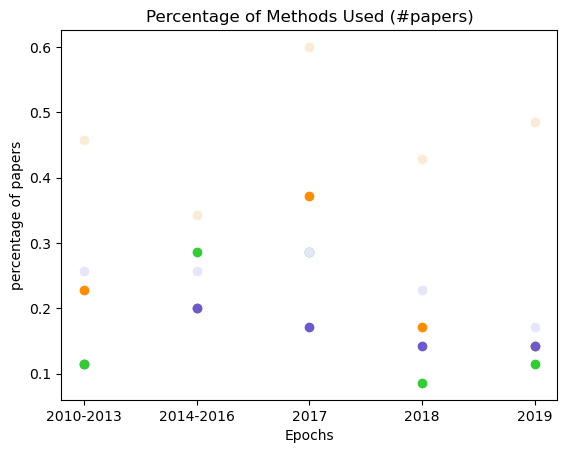

In [96]:
plt.scatter(x=pHat.columns,y=pHat.iloc[1],c='darkorange')# Handled_Missing_Data
plt.scatter(x=pHat.columns,y=pHat.iloc[0],c='antiquewhite')# Handled_Missing_Data
plt.scatter(x=pHat.columns,y=pHat.iloc[2],c='slateblue') # Real-World_Method
plt.scatter(x=pHat.columns,y=pHat.iloc[3],c='limegreen') # Sensitivity_Analysis 
#plt.scatter(x=pHat.columns,y=pHat.iloc[3],c='lavender')  # Potential_RWM
plt.scatter(x=pHat.columns,y=pHat.iloc[5],c='lavender') # combined RWM 
# darkorange : assess missing
#antiquewhite: combined missing
#springgreen: sensitivity analysis 
plt.ylabel('percentage of papers')
plt.xlabel('Epochs')
plt.title("Percentage of Methods Used (#papers)")

In [97]:
pHat
print(pHat.iloc[0])

2010-2013    0.4571
2014-2016    0.3429
2017         0.6000
2018         0.4286
2019         0.4857
Name: Mentioned_Missingness, dtype: float64


In [98]:
pHat_percentage = pHat*100

In [99]:
pHat_percentage

,2010-2013,2014-2016,2017,2018,2019
Mentioned_Missingness,45.71,34.29,60.00,42.86,48.57
Assessed_Missingness,22.86,20.00,37.14,17.14,14.29
Real-World_Method,11.43,20.00,17.14,14.29,14.29
Sensitivity_Analysis,11.43,28.57,28.57,8.57,11.43
Potential_RWM,17.14,5.71,11.43,8.57,2.86
Combined RWM,25.71,25.71,28.57,22.86,17.14


In [100]:
err_range_percentage = err_df*100
err_range_percentage

,2010-2013,2014-2016,2017,2018,2019
Mentioned_Missingness,16.50,15.73,16.23,16.40,16.56
Assessed_Missingness,13.91,13.25,16.01,12.49,11.59
Real-World_Method,10.54,13.25,12.49,11.59,11.59
Sensitivity_Analysis,10.54,14.97,14.97,9.27,10.54
Potential_RWM,12.49,7.69,10.54,9.27,5.52
Combined RWM,14.48,14.48,14.97,13.91,12.49


In [101]:
!pwd

/Users/chenyuli/Research_Thesis/Analytics


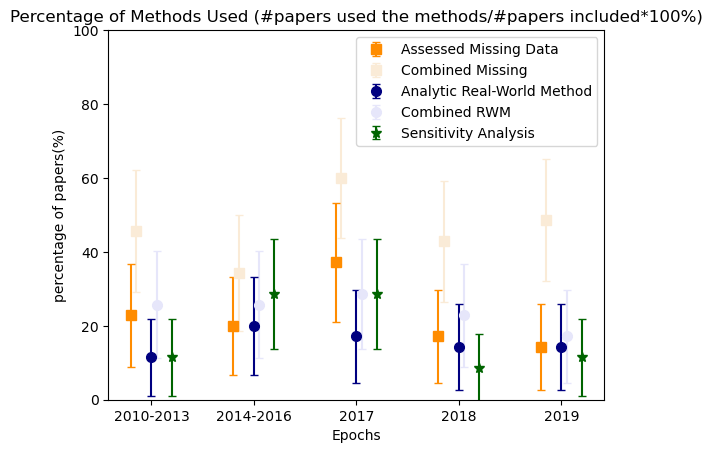

In [102]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
f, ax = plt.subplots()
x_ticks = ["2010-2013", "2014-2016", "2017", "2018", "2019"]
groups=['Assessed Missing Data','Combined Missing','Analytic Real-World Method','Combined RWM','Sensitivity Analysis']
x_1 = np.arange(1, 6)-0.2
x_1_5 = x_1+0.05
x_2 = x_1 +0.2
x_3 = x_2 +0.05
x_4 = x_2 + 0.2
# ax.errorbar(x=x_1, y=pHat.iloc[1], yerr=err_range[1], color='darkorange', capsize=3, linestyle="None", marker="s", markersize=7, mfc="darkorange", mec='darkorange')# Assess missing
# ax.errorbar(x=x_1_5, y=pHat.iloc[0], yerr=err_range[0], color='antiquewhite', capsize=3, linestyle="None", marker="s", markersize=7, mfc='antiquewhite', mec="antiquewhite")# Assess missing
# ax.errorbar(x=x_2, y=pHat.iloc[2], yerr=err_range[2], color="navy", capsize=3, linestyle="None", marker="o", markersize=7, mfc="navy", mec="navy") # RWM
# ax.errorbar(x=x_4, y=pHat.iloc[3], yerr=err_range[3], color="darkgreen", capsize=3, linestyle="None", marker="*", markersize=7, mfc="darkgreen", mec="darkgreen")# Sensitivity
# ax.errorbar(x=x_3, y=pHat.iloc[5], yerr=err_range[5], color="lavender", capsize=3, linestyle="None", marker="o", markersize=7, mfc="lavender", mec="lavender") # Combined RWM
ax.errorbar(x=x_1, y=pHat_percentage.iloc[1], yerr=err_range_percentage.iloc[1], color='darkorange', capsize=3, linestyle="None", marker="s", markersize=7, mfc="darkorange", mec='darkorange')# Assess missing
ax.errorbar(x=x_1_5, y=pHat_percentage.iloc[0], yerr=err_range_percentage.iloc[0], color='antiquewhite', capsize=3, linestyle="None", marker="s", markersize=7, mfc='antiquewhite', mec="antiquewhite")# Assess missing
ax.errorbar(x=x_2, y=pHat_percentage.iloc[2], yerr=err_range_percentage.iloc[2], color="navy", capsize=3, linestyle="None", marker="o", markersize=7, mfc="navy", mec="navy") # RWM
ax.errorbar(x=x_3, y=pHat_percentage.iloc[5], yerr=err_range_percentage.iloc[5], color="lavender", capsize=3, linestyle="None", marker="o", markersize=7, mfc="lavender", mec="lavender") # Combined RWM
ax.errorbar(x=x_4, y=pHat_percentage.iloc[3], yerr=err_range_percentage.iloc[3], color="darkgreen", capsize=3, linestyle="None", marker="*", markersize=7, mfc="darkgreen", mec="darkgreen")# Sensitivity


ax.set_xticks(x_2)
ax.set_xticklabels(x_ticks)
#plt.axhline(0.5,linestyle='--')
plt.ylim(0,100)
plt.ylabel('percentage of papers(%)')
plt.xlabel('Epochs')
plt.title("Percentage of Methods Used (#papers used the methods/#papers included*100%)")
plt.legend(groups)
plt.show()
#plt.savefig('Percentage.png')

   ## Step 8- Denominator Analysis
   ### Table One

In [103]:
pip install tableone

Note: you may need to restart the kernel to use updated packages.


In [104]:
from tableone import TableOne, load_dataset
import pandas as pd

In [105]:
Article_Review=pd.read_csv('/Users/chenyuli/Research_Thesis/Validate/20210707/20210707_article_review.csv')   
#Article_Review=pd.read_excel('/Users/chenyuli/Research_Thesis/Validate/20210707/20210707_article_review.xlsx')
AR_Include=Article_Review[Article_Review.Include_in_Research=='Yes']
AR_Include

,Review_ID,included_No,Reviewer_ID,EndNote_Index,Pubmed_ID,Year,Article_Name,Review_Date,First_Author,Key_words,...,Association_Type,Unit_of_Analysis,Check_List,Mention_Missing_Data,Handled_Missing_Data,Rate_of_Article,Include_in_Research,Exclusion Reason,Other_Notes,Unnamed: 28
4,5.0,1.0,NaN,3197,31167871,2019,Trends in the incidence of testing for vitamin...,12/27/20,"Crowe, F. L.",Adult\nAged\nEthnic Groups\nFemale\nHumans\nIn...,...,Asosciation,patient,No,"Yes, limitation",No,NaN,Yes,NaN,NaN,NaN
10,11.0,2.0,NaN,1259,31306445,2019,An interactive nomogram to predict healthcare-...,12/27/20,"Zhang, M.",Acinetobacter Infections/diagnosis/epidemiolog...,...,Association,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN
11,12.0,3.0,NaN,1538,31881945,2019,Sex differences in 10-year ischemic cardiovasc...,12/27/20,"Yang, L.",Aged\nChina/epidemiology\nComorbidity\nDatabas...,...,Association,patient,No,No,No,NaN,Yes,NaN,NaN,NaN
12,13.0,4.0,NaN,3304,31332959,2019,Clinical outcomes of external beam radiotherap...,12/27/20,"Lee, C. C.",Aged\nFollow-Up Studies\nHumans\nMale\nMiddle ...,...,Association,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN
14,15.0,5.0,NaN,1717,31210654,2019,Preoperative Pulmonary Function Test Results A...,12/27/20,"Burjek, N. E.",ng/*physiopathology\nMale\nMaximal Respiratory...,...,Association,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,381.0,31.0,NaN,4917,22871081,2012,Likelihood of acute coronary syndrome in emerg...,7/7/21,"Ekelund, U.",Acute Coronary Syndrome/*complications/*diagno...,...,Associaiton,Patient,No,"Yes, data cleaning","Yes, excluded",NaN,Yes,NaN,NaN,NaN
490,387.0,32.0,NaN,5805,23756616,2013,Synchronization of administrations of chemothe...,7/7/21,"Hill, J. W.",Adolescent\nAdult\nAged\nAmbulatory Care Facil...,...,Association,Patient,No,"Yes, data description",No,NaN,Yes,NaN,NaN,NaN
492,389.0,33.0,NaN,3587,22484068,2013,Comparisons of 30-day mortalities and 90-day f...,7/7/21,"Kim, K. H.","Adult\nAged\nAged, 80 and over\nBody Mass Inde...",...,Association,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN
494,391.0,34.0,NaN,4342,21801091,2011,Risk factors for emergent preterm delivery in ...,7/7/21,"Fishman, S. G.",Adult\nCohort Studies\nFemale\nGestational Age...,...,Associaiton,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN


In [106]:
type(AR_Include)

pandas.core.frame.DataFrame

In [107]:
# Create Epoch for table one
AR_Include['Epoch']=AR_Include.Year

for i in range(len(AR_Include.Year)):
    if AR_Include.Year.iloc[i]==2010 or AR_Include.Year.iloc[i]==2011 or AR_Include.Year.iloc[i]==2012 or AR_Include.Year.iloc[i]==2013:
        AR_Include.Epoch.iloc[i]='2010-2013'
    elif AR_Include.Year.iloc[i]==2014 or AR_Include.Year.iloc[i]==2015 or AR_Include.Year.iloc[i]==2016:
        AR_Include.Epoch.iloc[i]='2014-2016'
    elif AR_Include.Year.iloc[i]==2017:
        AR_Include.Epoch.iloc[i]='2017'
    elif AR_Include.Year.iloc[i]==2018:
        AR_Include.Epoch.iloc[i]='2018'
    else:
        AR_Include.Epoch.iloc[i]='2019'

/var/folders/v0/r16j2f9545n7rrq_rvqlxn180000gn/T/ipykernel_11503/483161278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AR_Include['Epoch']=AR_Include.Year
/Users/chenyuli/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/chenyuli/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

In [108]:
AR_Include

,Review_ID,included_No,Reviewer_ID,EndNote_Index,Pubmed_ID,Year,Article_Name,Review_Date,First_Author,Key_words,...,Unit_of_Analysis,Check_List,Mention_Missing_Data,Handled_Missing_Data,Rate_of_Article,Include_in_Research,Exclusion Reason,Other_Notes,Unnamed: 28,Epoch
4,5.0,1.0,NaN,3197,31167871,2019,Trends in the incidence of testing for vitamin...,12/27/20,"Crowe, F. L.",Adult\nAged\nEthnic Groups\nFemale\nHumans\nIn...,...,patient,No,"Yes, limitation",No,NaN,Yes,NaN,NaN,NaN,2019
10,11.0,2.0,NaN,1259,31306445,2019,An interactive nomogram to predict healthcare-...,12/27/20,"Zhang, M.",Acinetobacter Infections/diagnosis/epidemiolog...,...,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN,2019
11,12.0,3.0,NaN,1538,31881945,2019,Sex differences in 10-year ischemic cardiovasc...,12/27/20,"Yang, L.",Aged\nChina/epidemiology\nComorbidity\nDatabas...,...,patient,No,No,No,NaN,Yes,NaN,NaN,NaN,2019
12,13.0,4.0,NaN,3304,31332959,2019,Clinical outcomes of external beam radiotherap...,12/27/20,"Lee, C. C.",Aged\nFollow-Up Studies\nHumans\nMale\nMiddle ...,...,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN,2019
14,15.0,5.0,NaN,1717,31210654,2019,Preoperative Pulmonary Function Test Results A...,12/27/20,"Burjek, N. E.",ng/*physiopathology\nMale\nMaximal Respiratory...,...,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,381.0,31.0,NaN,4917,22871081,2012,Likelihood of acute coronary syndrome in emerg...,7/7/21,"Ekelund, U.",Acute Coronary Syndrome/*complications/*diagno...,...,Patient,No,"Yes, data cleaning","Yes, excluded",NaN,Yes,NaN,NaN,NaN,2010-2013
490,387.0,32.0,NaN,5805,23756616,2013,Synchronization of administrations of chemothe...,7/7/21,"Hill, J. W.",Adolescent\nAdult\nAged\nAmbulatory Care Facil...,...,Patient,No,"Yes, data description",No,NaN,Yes,NaN,NaN,NaN,2010-2013
492,389.0,33.0,NaN,3587,22484068,2013,Comparisons of 30-day mortalities and 90-day f...,7/7/21,"Kim, K. H.","Adult\nAged\nAged, 80 and over\nBody Mass Inde...",...,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN,2010-2013
494,391.0,34.0,NaN,4342,21801091,2011,Risk factors for emergent preterm delivery in ...,7/7/21,"Fishman, S. G.",Adult\nCohort Studies\nFemale\nGestational Age...,...,Patient,No,No,No,NaN,Yes,NaN,NaN,NaN,2010-2013


In [109]:
A_columns=['Study_Design_Type','Country/district ','Mention_Missing_Data','Handled_Missing_Data','Check_List']
groupby = 'Epoch'
mytable = TableOne(AR_Include, columns=A_columns,groupby=groupby)
mytable
mytable.to_excel('/Users/chenyuli/Research_Thesis/Validate/20210707/20210707_Table1.xlsx')

/Users/chenyuli/opt/anaconda3/lib/python3.9/site-packages/tableone/tableone.py:991: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df['percent'] = df['freq'].div(df.freq.sum(level=0),


In [110]:
analytic_tools= TableOne(AR_Include, columns=['Analytic_tool'],groupby=groupby)
analytic_tools

Grouped by Epoch                                                             
                                                             Missing    Overall 2010-2013 2014-2016      2017      2018      2019
n                                                                           175        35        35        35        35        35
Analytic_tool, n (%) CART Salford Predictive Miner                 0    1 (0.6)   1 (2.9)                                        
                     Didn't mention                                   28 (16.0)  6 (17.1)  5 (14.3)  8 (22.9)   3 (8.6)  6 (17.1)
                     EZR                                                1 (0.6)                                           1 (2.9)
                     Excel                                              1 (0.6)                                           1 (2.9)
                     GraphPad Prism                                     1 (0.6)                                           1 (2.9)
                     JMP                                                1 (0.6)   1 (2.9)                                        
                     Mplus                                              1 (0.6)   1 (2.9)                                        
                     NCSS                                               1 (0.6)                                           1 (2.9)
                     PASW Statistics 17.0                               1 (0.6)   1 (2.9)                                        
                     R                                                 14 (8.0)                      4 (11.4)  6 (17.1)  4 (11.4)
                     R, SPSS                                            1 (0.6)                                 1 (2.9)          
                     SAS                                              37 (21.1)  8 (22.9)  8 (22.9)  9 (25.7)  7 (20.0)  5 (14.3)
                     SAS, R                                             1 (0.6)                       1 (2.9)                    
                     SPSS                                             36 (20.6)  8 (22.9)  9 (25.7)  6 (17.1)  8 (22.9)  5 (14.3)
                     SPSS, Epidata                                      1 (0.6)                                           1 (2.9)
                     SPSS, R                                            1 (0.6)                                 1 (2.9)          
                     SPSS, SAS                                          1 (0.6)                                 1 (2.9)          
                     SPSS, Statistica                                   1 (0.6)   1 (2.9)                                        
                     SPSS,MedCalc                                       1 (0.6)             1 (2.9)                              
                     SPSS,Stata                                         1 (0.6)   1 (2.9)                                        
                     STATA                                              6 (3.4)             2 (5.7)  4 (11.4)                    
                     STATA, SPSS                                        1 (0.6)             1 (2.9)                              
                     SigmaPlot                                          1 (0.6)                                           1 (2.9)
                     Stata                                            31 (17.7)  6 (17.1)  7 (20.0)   2 (5.7)  7 (20.0)  9 (25.7)
                     Stata, R                                           4 (2.3)             2 (5.7)   1 (2.9)   1 (2.9)          
                     Statview                                           1 (0.6)   1 (2.9)

## Step 9  Meta-regression

In [111]:
# pip install git+https://github.com/neurostuff/pymare.git

In [112]:
pHat.iloc[2]

2010-2013    0.1143
2014-2016    0.2000
2017         0.1714
2018         0.1429
2019         0.1429
Name: Real-World_Method, dtype: float64

In [147]:
import pymare
import numpy as np
from pymare import meta_regression
# Sensitivity analysis for Real-World Methods used 
# y proportion of study 
# X middle of Epoch [2011.5,2015,2017.5,2018.5,2019.5]  meta-regression with time as the independent variable- mid poiont of epoch 
# v  pq/n
# pvalue cannot reject 0, CI contains 0
# proportion of use RWM increase 3.4% per year , even use the small sample size and upper bound , 
y1 = pHat.iloc[2]# study-level estimates
v1=err_df.iloc[2]**2  # Study-level variance
# X0=[2011.5,2015,2017.5,2018.5,2019.5]
# X1 = [11.5,15,17.5,18.5,19.5]
# X2 = [1.5,5,7.5,8.5,9.5]# 2010 

X3 = [-3.5,0,2.5,3.5,4.5]
# X4=[X*X for X in X3]
# X5=[]
print(pHat.iloc[2])
for i in range(len(X3)):
        X5.append([X3[i],X4[i]])
# fit models 
# result_RWM_0 = meta_regression(y1,v=v1,X=X0, X_names=['Real-World Methods'],add_intercept=True, method='REML')
# result_RWM_1 = meta_regression(y1,v=v1,X=X1, X_names=['Real-World Methods'],add_intercept=True, method='REML')
# result_RWM_2 = meta_regression(y1,v=v1,X=X2, X_names=['Real-World Methods'],add_intercept=True, method='REML')
result_RWM_3 = meta_regression(y1,v=v1,X=X3, X_names=['Real-World Methods'],add_intercept=True, method='REML')
# result_RWM_4 = meta_regression(y1,v=v1,X=X5, X_names=['Real-World Methods',"square"],add_intercept=True, method='REML')
# transform results 
# result_RWM_0=result_RWM_0.to_df()
# result_RWM_1=result_RWM_1.to_df()
# result_RWM_2=result_RWM_2.to_df()
result_RWM_3=result_RWM_3.to_df()
# result_RWM_4=result_RWM_4.to_df()
# print results
result_RWM_3

2010-2013    0.1143
2014-2016    0.2000
2017         0.1714
2018         0.1429
2019         0.1429
Name: Real-World_Method, dtype: float64


,name,estimate,se,z-score,p-value,ci_0.025,ci_0.975
0,intercept,0.146054,0.056756,2.573397,0.010071,0.034816,0.257293
1,Real-World Methods,0.003107,0.017193,0.180709,0.856596,-0.030590,0.036804


In [144]:
# Sensitivity analysis for missing data
print(pHat.iloc[1])
y3 = pHat.iloc[1]# study-level estimates
v3=err_df.iloc[1]**2  # Study-level variance
X = [-3.5,0,2.5,3.5,4.5]
result_HM = meta_regression(y3,v=v3,X=X, X_names=['Assessed Missing Data'],add_intercept=True,
                         method='REML').to_df()
result_HM

2010-2013    0.2286
2014-2016    0.2000
2017         0.3714
2018         0.1714
2019         0.1429
Name: Assessed_Missingness, dtype: float64


,name,estimate,se,z-score,p-value,ci_0.025,ci_0.975
0,intercept,0.219484,0.068244,3.216171,0.001299,0.085728,0.353239
1,Assessed Missing Data,-0.007343,0.020506,-0.358089,0.720277,-0.047535,0.032849


In [145]:
print( pHat.iloc[0])
# Combined Missing
y2 = pHat.iloc[0]# study-level estimates ( Mentioned Missing)
v2=err_df.iloc[0]**2 # Study-level variance
X = [-3.5,0,2.5,3.5,4.5]
result_Combined_Missing = meta_regression(y2,v=v2,X=X,X_names= ['Combined Missing'], add_intercept=True,
                         method='REML').to_df()
result_Combined_Missing

2010-2013    0.4571
2014-2016    0.3429
2017         0.6000
2018         0.4286
2019         0.4857
Name: Mentioned_Missingness, dtype: float64


,name,estimate,se,z-score,p-value,ci_0.025,ci_0.975
0,intercept,0.449094,0.080935,5.548797,2.876418e-08,0.290463,0.607724
1,Combined Missing,0.008842,0.025638,0.344885,7.301805e-01,-0.041407,0.059091


In [135]:
rows, cols = (5, 2)
arr = [[0]*cols]*rows
arr
for i in range(len(X3)):
    arr[i]=(X3[i],X4[i])


In [136]:
# sphinx_gallery_thumbnail_number = 3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

import pymare


# A small function to make things easier later on
def var_to_ci(y, v, n):
    """Convert sampling variance to 95% CI"""
    term = 1.96 * np.sqrt(v) / np.sqrt(n)
    return y - term, y + term

In [148]:
print(pHat.iloc[5])
# Combined RWM
y2 = pHat.iloc[5]# study-level estimates
v2=err_df.iloc[5]**2 # Study-level variance
X = [-3.5,0,2.5,3.5,4.5]
result_Combined_RWM = meta_regression(y2,v=v2,X=X,X_names= ['Combined RWM'], add_intercept=True,
                         method='REML').to_df()
result_Combined_RWM

2010-2013    0.2571
2014-2016    0.2571
2017         0.2857
2018         0.2286
2019         0.1714
Name: Combined RWM, dtype: float64


,name,estimate,se,z-score,p-value,ci_0.025,ci_0.975
0,intercept,0.248169,0.071710,3.460730,0.000539,0.107620,0.388718
1,Combined RWM,-0.008227,0.021696,-0.379182,0.704553,-0.050751,0.034297


In [137]:
pHat.iloc[3]

2010-2013    0.1143
2014-2016    0.2857
2017         0.2857
2018         0.0857
2019         0.1143
Name: Sensitivity_Analysis, dtype: float64

In [149]:
result_RWM_0
print(pHat.iloc[3])
# Sensitivity analysis for Sensitivity-analysis performed
y2 = pHat.iloc[3]# study-level estimates assessed missing
v2=err_df.iloc[3]**2  # Study-level variance
X = [-3.5,0,2.5,3.5,4.5] # 2015 base line 
result_SA = meta_regression(y2,v=v2,X=X, X_names=['Sensitivity Analysis'],add_intercept=True,
                         method='REML').to_df()
result_SA

2010-2013    0.1143
2014-2016    0.2857
2017         0.2857
2018         0.0857
2019         0.1143
Name: Sensitivity_Analysis, dtype: float64


,name,estimate,se,z-score,p-value,ci_0.025,ci_0.975
0,intercept,0.150251,0.057206,2.626505,0.008627,0.038130,0.262372
1,Sensitivity Analysis,-0.003114,0.016510,-0.188608,0.850400,-0.035473,0.029245


In [140]:
pHat.iloc[5]

2010-2013    0.2571
2014-2016    0.2571
2017         0.2857
2018         0.2286
2019         0.1714
Name: Combined RWM, dtype: float64

In [141]:
print(pHat.iloc[5])
# Combined RWM
y2 = pHat.iloc[5]# study-level estimates
v2=err_df.iloc[5]**2 # Study-level variance
X = [-3.5,0,2.5,3.5,4.5]
result_Combined_RWM = meta_regression(y2,v=v2,X=X,X_names= ['Combined RWM'], add_intercept=True,
                         method='REML').to_df()
result_Combined_RWM

,name,estimate,se,z-score,p-value,ci_0.025,ci_0.975
0,intercept,0.248169,0.071710,3.460730,0.000539,0.107620,0.388718
1,Combined RWM,-0.008227,0.021696,-0.379182,0.704553,-0.050751,0.034297


In [142]:
type(result_RWM_3)


pandas.core.frame.DataFrame

In [143]:
Report_result = result_HM.append(result_Combined_Missing).append(result_RWM_3).append(result_Combined_RWM).append(result_SA)
Report_result.to_csv('/Users/chenyuli/Research_Thesis/Analytics/20220228_MetaRegression.csv')

# Weighted analysis 

In [124]:
Method_Review=pd.read_excel('/Users/chenyuli/Research_Thesis/Validate/20210707/20210707_method_review.xlsx')
Method_Review
#Sensitivity_list=Method_Review[Method_Review.Analytic_Method_Name=='Sensitivity'].EndNote_ID
#Sensitivity_list

,EndNote_ID,Pubmed_ID,Analytic_Method_Name,Real_World_Evidence,Year,Comment
0,1230,24129480,Cox proportional hazard models,0,2013,NaN
1,1230,24129480,Sensitivity analysis,Real-World Evidence,2013,NaN
2,1564,21694510,Sensitivity analysis,Real-World Evidence,2011,NaN
3,1564,21694510,Statistic testing,0,2011,NaN
4,1564,21694510,Multivariate Logistic Regression,0,2011,NaN
...,...,...,...,...,...,...
407,4342,21801091,Logistic Regression,0,2011,NaN
408,4342,21801091,kaplan-Meier method,0,2011,NaN
409,4342,21801091,statistic Testing,0,2011,NaN
410,5790,23165956,Logistic Regression,0,2013,NaN


In [125]:
HM_list=Article_Review[(Article_Review.Include_in_Research=='Yes')&(Article_Review.Mention_Missing_Data!="No")].EndNote_Index
HM_list

4      3197
17     1449
19     3576
20     4966
21     4012
       ... 
458    3743
468    5219
480    5792
484    4917
490    5805
Name: EndNote_Index, Length: 81, dtype: int64